In [86]:
# Results Rare variants analysis
### Bonferroni only - Update Nov 2022

# Generate Venn diagram to check which way to approach manuscript style
# file locations are all in cd /data/CARD/projects/23andme_annotation/Rare_variant_project_VP/

# Overview
## 0. Setup
## 1. 23andMe only
## 2. Bonferroni correction in 23andMe
## 3. Meta-analysis
## 4. How many variants enough power but not significant?

In [1]:
## 0. Setup
library(data.table)
library(tidyverse)
library(ggvenn)
library(ggplot2)
library(gridExtra)
library(genpwr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()

Loading required package: grid


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




# 1. 23andMe only

## 1.1 Load and edit file

In [62]:
annotated = fread("META_23andme_summary_all_cols.txt")
annotated = annotated %>% filter(!is.na(pvalue))
colnames(annotated)

[1] "CHR.BP"             "REF_old"            "ALT_old"           
 [4] "position"           "Gene"               "assay.name"        
 [7] "ExonicFunc.refGene" "VariantName"        "CLNDN"             
[10] "CLNREVSTAT"         "CLNSIG"             "scaffold"          
[13] "Allele1"            "Allele2"            "pvalue"            
[16] "pval.unadj"         "effect_old"         "stderr"            
[19] "pass"               "src"                "dose.b"            
[22] "AA.0"               "AB.0"               "BB.0"              
[25] "im.num.0"           "dose.b.0"           "AA.1"              
[28] "AB.1"               "BB.1"               "dose.b.1"          
[31] "im.num.1"           "is.v1"              "is.v2"             
[34] "is.v3"              "is.v4"              "is.v5"             
[37] "gt.rate"            "hw.p.value"         "p.date"            
[40] "freq.b"             "avg.rsqr"           "min.rsqr"          
[43] "p.batch"            "N_controls"         "N_cases"           
[46] "N_INFORMATIVE"      "MarkerName"         "alternative_allele"
[49] "effect_allele"      "freq.a"             "FREQ_old"          
[52] "REF"                "ALT"                "FREQ"              
[55] "Flip"               "effect"

In [63]:
# generate more stats
andme_edit = annotated
andme_edit = andme_edit %>% mutate(Effectv2 = if_else(effect <0, abs(effect), effect))
andme_edit = andme_edit %>% mutate(OR = exp(Effectv2), L95 = exp(Effectv2 - 1.96*stderr), U95 = exp(Effectv2 + 1.96*stderr))
andme_edit$U95 = as.numeric(andme_edit$U95)

In [64]:
#how many variants left? # 656
dim(andme_edit)

[1] 656  60

In [65]:
# edit gene name
andme_edit$Gene[andme_edit$Gene == "FBXO7;FBXO7"] <- "FBXO7"
andme_edit$Gene[andme_edit$Gene == "GBA"] <- "GBA1"

andme_edit$VariantName = gsub("GBA","GBA1",andme_edit$VariantName) 

### 656 VARIANTS IN 23ANDME ###

In [66]:
head(andme_edit)
dim(andme_edit)

CHR.BP,REF_old,ALT_old,position,Gene,assay.name,ExonicFunc.refGene,VariantName,CLNDN,CLNREVSTAT,⋯,FREQ_old,REF,ALT,FREQ,Flip,effect,Effectv2,OR,L95,U95
<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1:155235195,C,T,155235195,GBA1,rs80356772,nonsynonymous SNV,GBA1_R502H,Gaucher_disease_type_I|Gaucher_disease_type_II|Gaucher_disease_type_III|Gaucher_disease_type_3C|Gaucher_disease|not_provided,"criteria_provided,_conflicting_interpretations",⋯,7.029013e-06,C,T,7.029013e-06,FALSE,1.2765240,1.2765240,3.584159,4.557245e-01,2.818852e+01
chr1:155235196,G,A,155235196,GBA1,rs80356771,nonsynonymous SNV,GBA1_R502C,"Lewy_body_dementia|Parkinson_disease,_late-onset|Gaucher_disease_type_I|Gaucher_disease_type_II|Gaucher_disease_type_III|Gaucher_disease_type_3C|Gaucher_disease,_perinatal_lethal|Gaucher_disease|not_provided","criteria_provided,_multiple_submitters,_no_conflicts",⋯,9.998007e-01,G,A,1.992936e-04,TRUE,1.2622116,1.2622116,3.533227,2.391989e+00,5.218960e+00
chr1:155235231,T,C,155235231,GBA1,rs76071730,nonsynonymous SNV,GBA1_H490R,.,.,⋯,9.999993e-01,T,C,6.583656e-07,TRUE,-1.0092804,1.0092804,2.743626,3.964064e-15,1.898931e+15
chr1:155235708,G,C,155235708,GBA1,rs121908295,nonsynonymous SNV,GBA1_P454R,Gaucher_disease_type_II,no_assertion_criteria_provided,⋯,9.999596e-01,G,C,4.037412e-05,TRUE,0.3209298,0.3209298,1.378409,5.264675e-01,3.608981e+00
chr1:155235765,T,G,155235765,GBA1,rs75385858,nonsynonymous SNV,GBA1_N435T,.,.,⋯,9.999990e-01,T,G,9.892671e-07,TRUE,-1.0029091,1.0029091,2.726201,1.112436e-26,6.680986e+26
chr1:155235777,T,A,155235777,GBA1,rs77738682,nonsynonymous SNV,GBA1_N431I,.,.,⋯,9.999805e-01,T,A,1.950232e-05,TRUE,2.0604963,2.0604963,7.849865,1.004068e+00,6.137074e+01


[1] 656  60

## 1.2 Add power file

In [67]:
# add power file
OR2_3 = fread("Power_file_OR1_OR2_OR3_with_metastatistics_all_variants748.txt")
head(OR2_3)
OR2_3 = OR2_3 %>% select(Chr, Start, VariantName, MAF_23, MAF_NFE, Power_at_alpha005_OR1.5, Power_at_alpha005_OR2, Power_at_alpha005_OR3) %>% unite(`CHR.BP`, c("Chr", "Start"), sep = ":")

dim(OR2_3)
# n=748/835 variants in power file, meaning they were MAF<1e-09 for OR=2 and MAF<1e-04 at OR=3

Chr,Start,VariantName,MAF_23,MAF_NFE,allfreq,Power_at_alpha005_OR1.5,Power_at_alpha005_OR2,Power_at_alpha005_OR3,Effectv2,OR,L95,U95,P-value
<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
chr1,155235057,GBA_G517S,6.809994e-07,NA,6.809994e-07,0.05016954,0.05111078,NA,NA,NA,NA,NA,NA
chr1,155235195,GBA_R502H,7.029013e-06,NA,7.029013e-06,0.05523130,0.06969984,NA,1.2765,3.584073,4.557495e-01,28.1856222884468,0.2251
chr1,155235196,GBA_R502C,1.992936e-04,0e+00,1.992936e-04,0.23439991,0.59600039,0.9552658,1.3347,3.798856,2.660122e+00,5.42505479588785,2.145e-13
chr1,155235197,GBA_N501K,3.618504e-06,NA,3.618504e-06,0.05266733,0.05589892,NA,1.0961,2.992473,2.907284e-03,3080.15746604485,0.7568
chr1,155235231,GBA_H490R,6.583656e-07,NA,6.583656e-07,0.05039391,0.05106963,NA,1.0093,2.743680,3.963948e-15,1899061098002020,0.9538
chr1,155235252,GBA_L483P,NA,6e-04,6.000000e-04,0.57125155,0.96865507,0.9999942,NA,NA,NA,NA,NA


[1] 748   7

In [68]:
# joinOR2_3
andme_power = left_join(andme_edit, OR2_3)
andme_power = andme_power %>% distinct()
dim(andme_power)

Joining, by = c("CHR.BP", "VariantName")


[1] 656  65

In [69]:
andme_power %>% group_by(`CHR.BP`) %>% tally() %>% filter(n>1)
# no duplicates


CHR.BP,n
<chr>,<int>


In [70]:
# how many variants had enough power? Don't use this tho, use only the ones used for analysis
## first generate numbers for this
andme_power$Power_Over80[andme_power$Power_at_alpha005_OR1.5>0.8] <- "YES"
andme_power$Power_Over80[andme_power$Power_at_alpha005_OR3>0.8] <- "YES"
andme_power$Power_Over80[is.na(andme_power$Power_Over80)] <- "NO"
#andme_power$Power_Over80[andme_power$CLNSIG == "Pathogenic" & andme_power$Power_at_alpha005_OR3>0.8] <- "YES"
#andme_power$Power_Over80[andme_power$CLNSIG == "Pathogenic/Risk_factor" & andme_power$Power_at_alpha005_OR3>0.8] <- "YES"

andme_power %>% group_by(Power_Over80) %>% tally()

andme_edit = andme_power
# enough power at OR=1.5 for 91 variants in general

Power_Over80,n
<chr>,<int>
NO,410
YES,246


In [71]:
# how many had NA power?
andme_power %>% filter(is.na(Power_at_alpha005_OR1.5)) ##n=2

# grouped
andme_power %>% group_by(!is.na(Power_at_alpha005_OR1.5),CLNSIG) %>% tally()


CHR.BP,REF_old,ALT_old,position,Gene,assay.name,ExonicFunc.refGene,VariantName,CLNDN,CLNREVSTAT,⋯,Effectv2,OR,L95,U95,MAF_23,MAF_NFE,Power_at_alpha005_OR1.5,Power_at_alpha005_OR2,Power_at_alpha005_OR3,Power_Over80
<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
chr1:155235195,C,T,155235195,GBA1,rs80356772,nonsynonymous SNV,GBA1_R502H,Gaucher_disease_type_I|Gaucher_disease_type_II|Gaucher_disease_type_III|Gaucher_disease_type_3C|Gaucher_disease|not_provided,"criteria_provided,_conflicting_interpretations",⋯,1.276524e+00,3.584159e+00,4.557245e-01,2.818852e+01,NA,NA,NA,NA,NA,NO
chr1:155235196,G,A,155235196,GBA1,rs80356771,nonsynonymous SNV,GBA1_R502C,"Lewy_body_dementia|Parkinson_disease,_late-onset|Gaucher_disease_type_I|Gaucher_disease_type_II|Gaucher_disease_type_III|Gaucher_disease_type_3C|Gaucher_disease,_perinatal_lethal|Gaucher_disease|not_provided","criteria_provided,_multiple_submitters,_no_conflicts",⋯,1.262212e+00,3.533227e+00,2.391989e+00,5.218960e+00,NA,NA,NA,NA,NA,NO
chr1:155235231,T,C,155235231,GBA1,rs76071730,nonsynonymous SNV,GBA1_H490R,.,.,⋯,1.009280e+00,2.743626e+00,3.964064e-15,1.898931e+15,NA,NA,NA,NA,NA,NO
chr1:155235708,G,C,155235708,GBA1,rs121908295,nonsynonymous SNV,GBA1_P454R,Gaucher_disease_type_II,no_assertion_criteria_provided,⋯,3.209298e-01,1.378409e+00,5.264675e-01,3.608981e+00,NA,NA,NA,NA,NA,NO
chr1:155235765,T,G,155235765,GBA1,rs75385858,nonsynonymous SNV,GBA1_N435T,.,.,⋯,1.002909e+00,2.726201e+00,1.112436e-26,6.680986e+26,NA,NA,NA,NA,NA,NO
chr1:155235777,T,A,155235777,GBA1,rs77738682,nonsynonymous SNV,GBA1_N431I,.,.,⋯,2.060496e+00,7.849865e+00,1.004068e+00,6.137074e+01,NA,NA,NA,NA,NA,NO
chr1:155235798,A,G,155235798,GBA1,rs772548282,nonsynonymous SNV,GBA1_L424P,Gaucher_disease_type_I,"criteria_provided,_single_submitter",⋯,2.017710e+00,7.521082e+00,2.250265e-09,2.513779e+10,NA,NA,NA,NA,NA,NO
chr1:155235813,T,G,155235813,GBA1,rs77284004,nonsynonymous SNV,GBA1_D419A,.,.,⋯,1.001072e+00,2.721197e+00,2.383114e-22,3.107242e+22,NA,NA,NA,NA,NA,NO
chr1:155235819,C,T,155235819,GBA1,rs754743440,stopgain,GBA1_W417X,Gaucher_disease,"criteria_provided,_single_submitter",⋯,3.118867e+00,2.262073e+01,9.115603e-14,5.613422e+15,NA,NA,NA,NA,NA,NO


!is.na(Power_at_alpha005_OR1.5),CLNSIG,n
<lgl>,<chr>,<int>
FALSE,.,20
FALSE,Conflicting_interpretations_of_pathogenicity,7
FALSE,Likely_pathogenic,4
FALSE,Pathogenic,11
FALSE,Pathogenic/Likely_pathogenic,6
FALSE,Pathogenic/Likely_pathogenic|_risk_factor,1
FALSE,Uncertain_significance,4
TRUE,.,203
TRUE,Benign,48


## 1.3 List of genes

In [72]:
# how many genes?
GenelistANDME= andme_edit %>% group_by(Gene) %>% tally() %>% arrange(-n)
# 31 genes, with POLG having 87 variants
#png("./Plots_Manuscript/List_of_genes_table_23andMeONLY.png", width=400,height=900,bg = "white")
#grid.table(GenelistANDME)
#dev.off()

GenelistANDME

Gene,n
<chr>,<int>
POLG,87
LRRK2,86
VPS13C,82
PLA2G6,54
GBA1,52
PINK1,38
DNAJC13,37
PRKN,36
EIF4G1,32


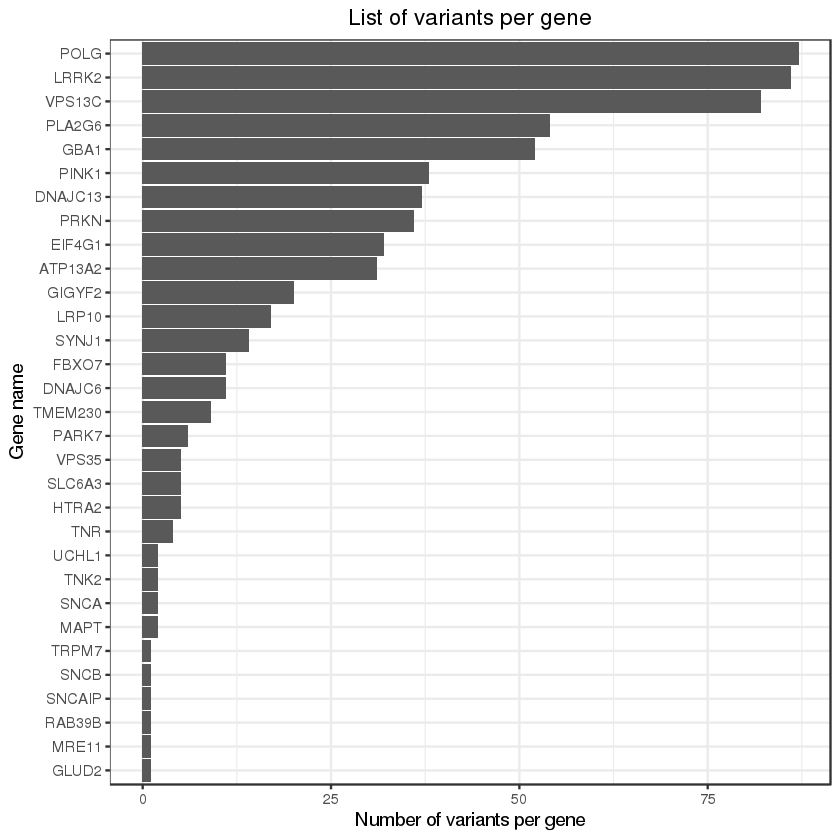

In [73]:
# variants per gene
genesANDME_656 = andme_edit %>% group_by(Gene) %>% tally() %>% mutate(perc = n/sum(n)*100) %>% arrange(-n)
genelist = ggplot(genesANDME_656,
       aes(x = n,
           y = reorder(Gene, n)
       )
) +
  theme_bw()+
  ggtitle("List of variants per gene")+
  theme(plot.title = element_text(hjust=0.5))+
  scale_fill_brewer(palette = "Pastel1")+
  labs(title="List of variants per gene", 
       x="Number of variants per gene", y = "Gene name")+
  geom_col()

genelist


## 1.4 Clinical significance

In [74]:
# clinical significance of those variants?
library(ggrepel)
andme_edit$CLNSIG[andme_edit$CLNSIG == "Likely_pathogenic"] <- "Pathogenic"
andme_edit$CLNSIG[andme_edit$CLNSIG == "Pathogenic/Likely_pathogenic"] <- "Pathogenic"
andme_edit$CLNSIG[andme_edit$CLNSIG == "Likely_benign"] <- "Benign"
andme_edit$CLNSIG[andme_edit$CLNSIG == "Benign/Likely_benign"] <- "Benign"
andme_edit$CLNSIG[andme_edit$CLNSIG == "Uncertain_significance"] <- "Conflicting/Uncertain/Unknown"
andme_edit$CLNSIG[andme_edit$CLNSIG == "Conflicting_interpretations_of_pathogenicity"] <- "Conflicting/Uncertain/Unknown"
andme_edit$CLNSIG[andme_edit$CLNSIG == "."] <- "Conflicting/Uncertain/Unknown"
andme_edit$CLNSIG[andme_edit$CLNSIG == "Conflicting_interpretations_of_pathogenicity|_risk_factor"] <- "Conflicting/Uncertain/Unknown"
andme_edit$CLNSIG[andme_edit$CLNSIG == "Pathogenic/Likely_pathogenic|_risk_factor"] <- "Pathogenic/Risk_factor"
andme_edit$CLNSIG[andme_edit$CLNSIG == "Pathogenic|_risk_factor"] <- "Pathogenic/Risk_factor"  
andme_edit$CLNSIG[andme_edit$CLNSIG == "risk_factor"] <- "Risk_factor"


group_CLNSIG = andme_edit
group_CLNSIG = group_CLNSIG %>% group_by(CLNSIG) %>% tally() %>% arrange(-n) %>% mutate(perc = n/sum(n)*100) %>% ungroup()
group_CLNSIG

CLNSIG,n,perc
<chr>,<int>,<dbl>
Conflicting/Uncertain/Unknown,461,70.2743902
Pathogenic,106,16.1585366
Benign,82,12.5000000
Risk_factor,5,0.7621951
Pathogenic/Risk_factor,2,0.3048780


In [75]:
461+106+82+5+2

[1] 656

In [76]:
#write.table(andme_edit, "File_for_power_results_23andMe.txt", quote =F, sep = "\t", row.names =F)

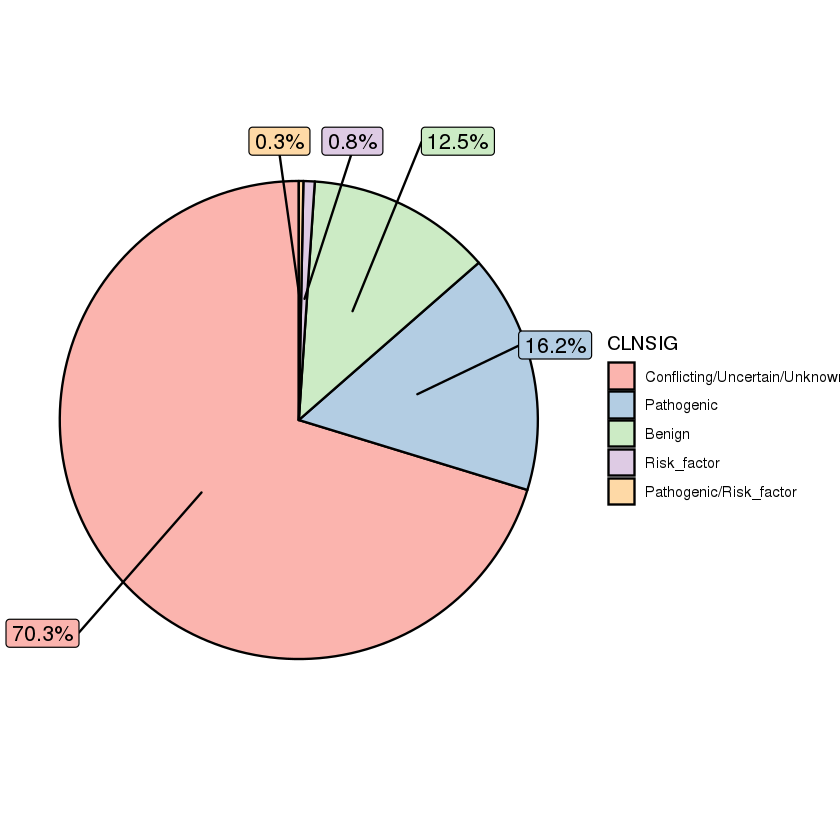

In [77]:
# Get the positions
df2 <- group_CLNSIG %>% 
  mutate(csum = rev(cumsum(rev(perc))), 
         pos = perc/2 + lead(csum, 1),
         pos = if_else(is.na(pos), perc/2, pos))

#png("./Plots_Manuscript/Clinical_significance_of_all_23andME_ONLY_656.txt", width=400,height=600,bg = "white")
Pie_chart = ggplot(group_CLNSIG, aes(x = "" , y = perc, fill = fct_inorder(CLNSIG))) +
  geom_col(width = 1, color = 1) +
  coord_polar(theta = "y") +
  scale_fill_brewer(palette = "Pastel1") +
  geom_label_repel(data = df2,
                   aes(y = pos, label = paste0(round(perc, digits = 1), "%")),
                   size = 4.5, nudge_x = 1, show.legend = FALSE) +
  guides(fill = guide_legend(title = "CLNSIG")) +
  theme_void()
#dev.off()

Pie_chart
## plot highlights: majority of variants are uncertain, unknown, or conflicting with regards to their clinical significance

## 1.5 Association with PD based on clinvar

In [78]:
# previously associated with PD?
andme_edit %>% group_by(grepl("Parkinson", CLNDN)) %>% tally() %>% mutate(perc = n/sum(n)*100)
## 484 not associated with PD before - tie this back in later!
## 172 previously associated with PD based on CLINVAR

"grepl(""Parkinson"", CLNDN)",n,perc
<lgl>,<int>,<dbl>
FALSE,484,73.78049
TRUE,172,26.21951


## 1.6 Significant at p<0.05

In [79]:
# how many variants p<0.05?
andme_edit %>% filter(pvalue <0.05) %>% tally()
## 50

n
<int>
50


## 1.7 Variants with enough power

In [80]:
# how many variants had enough power at OR=1.5
class(andme_edit$Power_at_alpha005_OR1.5)
andme_edit %>% filter(Power_at_alpha005_OR1.5>0.8) %>% tally() # 91 at OR=1.5

# how many variants had enough power at OR=1.5 and 2
andme_edit %>% filter(Power_Over80 == "YES") %>% tally() #161 at OR=1.5 and/or OR=2

[1] "numeric"

n
<int>
88


n
<int>
246


In [81]:
dim(andme_edit)

# how many have OR1.5 calculated 
andme_edit %>% filter(!is.na(Power_at_alpha005_OR1.5)) %>% tally() # 656

# how mamy have OR1.5 calculated and are pathogenic or risk facotr
andme_edit %>% filter(!is.na(Power_at_alpha005_OR1.5) & CLNSIG == "Pathogenic") %>% tally()
andme_edit %>% filter(!is.na(Power_at_alpha005_OR1.5) & CLNSIG == "Pathogenic/Risk_factor") %>% tally()

#105+2=107 have power calcualted at OR=1.5

[1] 656  66

n
<int>
603


n
<int>
85


n
<int>
1


In [82]:
# how many variants had enough power but p>0.05
class(andme_edit$pvalue)
andme_edit %>% filter(Power_Over80 == "YES" & pvalue >0.05) %>% distinct(VariantName) %>% tally() #149 (YES includes both ORs 1.5 and 2)

[1] "numeric"

n
<int>
230


In [83]:
# how many genes in that list? #29
andme_edit %>% filter(Power_Over80 == "YES" & pvalue >0.05) %>% group_by(Gene) %>% tally() %>% arrange(-n)

Gene,n
<chr>,<int>
VPS13C,41
POLG,28
DNAJC13,23
LRRK2,19
EIF4G1,17
PLA2G6,17
ATP13A2,14
GIGYF2,13
LRP10,10


In [84]:
# how many of those previously assoc with PD?
andme_edit %>% filter(Power_Over80 == "YES" & pvalue >0.05) %>% group_by(grepl("Parkinson", CLNDN)) %>% tally()


"grepl(""Parkinson"", CLNDN)",n
<lgl>,<int>
FALSE,173
TRUE,58


In [85]:
#andme_edit = andme_edit %>% separate(`CHR.BP.REF.ALT`, c("CHR", "BP", "REF", "ALT"), sep = ":")

In [86]:
# write into file
andme_enoughpower_notsig = andme_edit %>% filter(Power_Over80 == "YES" & pvalue >0.05) %>% select(`CHR.BP`, REF, ALT, assay.name, VariantName, Gene, CLNDN, CLNSIG, MAF_23, MAF_NFE, Power_at_alpha005_OR1.5, Power_at_alpha005_OR2, Power_at_alpha005_OR3, Power_Over80,effect, stderr, L95, OR, U95, pvalue) 
dim(andme_enoughpower_notsig)
#write.table(andme_enoughpower_notsig, "Variants_23andMeOnly_enoughPower_notsig.txt", row.names =F, sep ="\t", quote =F)

[1] 231  20

In [27]:
# Clinical significance
andme_enoughpower_notsig %>% group_by(CLNSIG) %>% tally()%>% mutate(perc =n/sum(n)*100) %>% arrange(-n)

CLNSIG,n,perc
<chr>,<int>,<dbl>
Conflicting/Uncertain/Unknown,171,74.0259740
Benign,52,22.5108225
Pathogenic,6,2.5974026
Risk_factor,2,0.8658009


In [28]:
37/171*100

[1] 21.63743

In [87]:
# how many associated with PD?
andme_enoughpower_notsig %>% group_by(grepl("arkinson", CLNDN)) %>% tally() %>% mutate(perc =n/sum(n)*100)
# 15 variants previously associated with PD

"grepl(""arkinson"", CLNDN)",n,perc
<lgl>,<int>,<dbl>
FALSE,172,74.45887
TRUE,59,25.54113


In [88]:
# clinical significance of those 15?
andme_enoughpower_notsig %>% filter(grepl("arkinson", CLNDN)) %>% group_by(CLNSIG) %>% tally() %>% mutate(perc = n/sum(n)*100) %>% arrange(-n)

CLNSIG,n,perc
<chr>,<int>,<dbl>
Conflicting/Uncertain/Unknown,55,93.220339
Pathogenic,2,3.389831
Risk_factor,2,3.389831


In [89]:
# Which ones are the with PD associated ones, that are pathogenic?
andme_enoughpower_notsig %>% filter(grepl("arkinson", CLNDN) & CLNSIG == "Pathogenic" | grepl("arkinson", CLNDN) & CLNSIG == "Risk_factor") %>% select(`CHR.BP`, REF, ALT, assay.name, VariantName, CLNDN, CLNSIG, MAF_23, MAF_NFE, Power_at_alpha005_OR1.5, Power_at_alpha005_OR2, effect, stderr, L95, OR, U95, pvalue)


CHR.BP,REF,ALT,assay.name,VariantName,CLNDN,CLNSIG,MAF_23,MAF_NFE,Power_at_alpha005_OR1.5,Power_at_alpha005_OR2,effect,stderr,L95,OR,U95,pvalue
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1:20644651,C,T,rs74315359,PINK1_T313M,"Parkinson_disease_6,_autosomal_recessive_early-onset",Pathogenic,0.0001748868,0.0000,0.2113945,0.5413621,0.13809897,0.36316473,0.5634347,1.148089,2.339417,0.7098136
chr2:232794835,A,C,rs116074753,GIGYF2_N457T,Parkinson_disease_11,Risk_factor,0.0006183822,0.0006,0.5839728,0.9725334,0.46041809,0.30293466,0.8751729,1.584736,2.869593,0.1543129
chr3:184327401,G,A,rs112176450,EIF4G1_R1206H,Parkinson_disease_18,Risk_factor,0.0003157987,0.0001,0.3420206,0.7916893,-0.04351321,0.37672051,0.4991448,1.044474,2.185589,0.9060394
chrX:121049176,T,G,rs9697983,GLUD2_S498A,"Parkinson_disease,_late-onset",Pathogenic,0.0228635182,0.0254,1.0000000,1.0000000,0.01820622,0.02373192,0.9720886,1.018373,1.066861,0.4450790


# 2. 23andMe Bonferroni

## 2.1 How many pass this threshold?

In [32]:
0.05/656
andme_edit %>% filter(pvalue <7.6219512195122e-05) %>% tally()

[1] 7.621951e-05

n
<int>
8


In [90]:
# write file
andme_hits = andme_edit %>% filter(pvalue <7.6219512195122e-05)

## 2.2 Clinical significance

In [91]:
andme_hits %>% group_by(CLNSIG) %>% tally()

CLNSIG,n
<chr>,<int>
Conflicting/Uncertain/Unknown,3
Pathogenic,3
Pathogenic/Risk_factor,2


In [92]:
andme_hits %>% arrange(CLNSIG) %>% select(VariantName, CLNSIG, OR, MAF_23, Power_at_alpha005_OR1.5, Power_at_alpha005_OR2) %>% arrange(-MAF_23)

VariantName,CLNSIG,OR,MAF_23,Power_at_alpha005_OR1.5,Power_at_alpha005_OR2
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
PRKN_R275W,Pathogenic,1.417634,2.492703e-03,0.99169598,1.00000000
LRRK2_G2019S,Pathogenic/Risk_factor,11.942566,6.261837e-04,0.58928882,0.97403725
LRRK2_R1441H,Pathogenic,46.104921,3.466037e-06,0.05257266,0.05565986
GBA1_E365K,Conflicting/Uncertain/Unknown,1.445835,NA,NA,NA
GBA1_T408M,Conflicting/Uncertain/Unknown,1.492278,NA,NA,NA
GBA1_D179H,Conflicting/Uncertain/Unknown,3.363911,NA,NA,NA
GBA1_R502C,Pathogenic,3.533227,NA,NA,NA
GBA1_N409S,Pathogenic/Risk_factor,2.248579,NA,NA,NA


## 2.3 Association with PD based on clinvar

In [93]:
# YES - previously associated with PD
andme_hits %>% filter(grepl("arkinson", CLNDN)) %>% arrange(CLNSIG) %>% select(VariantName, CLNSIG, CLNDN, assay.name)

VariantName,CLNSIG,CLNDN,assay.name
<chr>,<chr>,<chr>,<chr>
GBA1_T408M,Conflicting/Uncertain/Unknown,"Parkinson_disease,_late-onset|Gaucher_disease,_perinatal_lethal|Gaucher_disease|not_specified|not_provided",rs75548401
GBA1_R502C,Pathogenic,"Lewy_body_dementia|Parkinson_disease,_late-onset|Gaucher_disease_type_I|Gaucher_disease_type_II|Gaucher_disease_type_III|Gaucher_disease_type_3C|Gaucher_disease,_perinatal_lethal|Gaucher_disease|not_provided",rs80356771
LRRK2_R1441H,Pathogenic,"Parkinson_disease_8,_autosomal_dominant",rs34995376
PRKN_R275W,Pathogenic,See_cases|Neoplasm_of_ovary|Lung_carcinoma|Parkinson_disease_2|Leprosy_2|Young-onset_Parkinson_disease|not_provided,rs34424986
GBA1_N409S,Pathogenic/Risk_factor,"Thrombocytopenia|Abnormal_bleeding|Rigidity|Akinesia|Parkinson_disease|Lewy_body_dementia|Parkinson_disease,_late-onset|Gaucher_disease_type_I|Gaucher_disease_type_II|Gaucher_disease_type_III|Gaucher_disease_type_3C|Gaucher_disease,_perinatal_lethal|Gaucher_disease|Dementia,_Lewy_body,_susceptibility_to|not_provided",rs76763715
LRRK2_G2019S,Pathogenic/Risk_factor,"Parkinson_disease,_late-onset|Parkinson_disease_8,_autosomal_dominant|Young-onset_Parkinson_disease|Inborn_genetic_diseases|not_provided",rs34637584


In [37]:
# NO - not yet associated with PD
andme_hits %>% filter(!grepl("arkinson", CLNDN)) %>% arrange(CLNSIG) %>% select(VariantName, CLNSIG, CLNDN, assay.name)

VariantName,CLNSIG,CLNDN,assay.name
<chr>,<chr>,<chr>,<chr>
GBA1_E365K,Conflicting/Uncertain/Unknown,.,rs2230288
GBA1_D179H,Conflicting/Uncertain/Unknown,.,rs147138516


In [38]:
andme_hits %>% filter(VariantName == "LRRK2_R1441H") %>% select(VariantName, L95, OR, U95, pvalue, Power_Over80)

VariantName,L95,OR,U95,pvalue,Power_Over80
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
LRRK2_R1441H,14.69393,46.10492,144.6627,9.363789e-08,NO


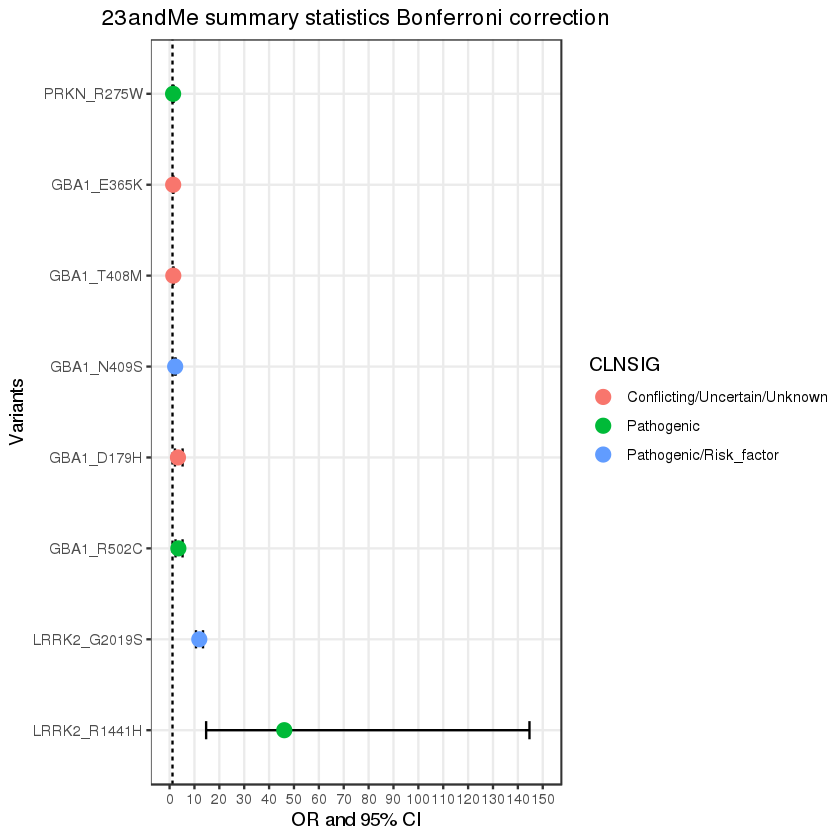

In [94]:
# Forest plot Bonferroni OR AND 95%CI
Plot_Bon_OR = ggplot(andme_hits, mapping = aes(x= OR, y = reorder(VariantName, -OR)))+
  geom_vline(aes(xintercept =1), size = .5, linetype = "dashed")+
  geom_errorbarh(aes(xmax = U95, xmin = L95), size = .5, height = .2) +
  geom_point(size = 3.5, aes(color = CLNSIG)) +
  scale_x_continuous(breaks = seq(0,150,10), labels = seq(0,150,10), limits = c(0,150)) +
  theme_bw()+
  theme(panel.grid.minor = element_blank()) +
  ylab("Variants")+
  xlab("OR and 95% CI")+
  ggtitle("23andMe summary statistics Bonferroni correction")+
  theme(plot.title = element_text(hjust=0.5))

#ggsave("./Plots_Manuscript/Forest_plot_8_Bonferroni_OR_95CI.png", Plot_Bon_OR, width = 12, height = 5, dpi=300, units = "in")

Plot_Bon_OR

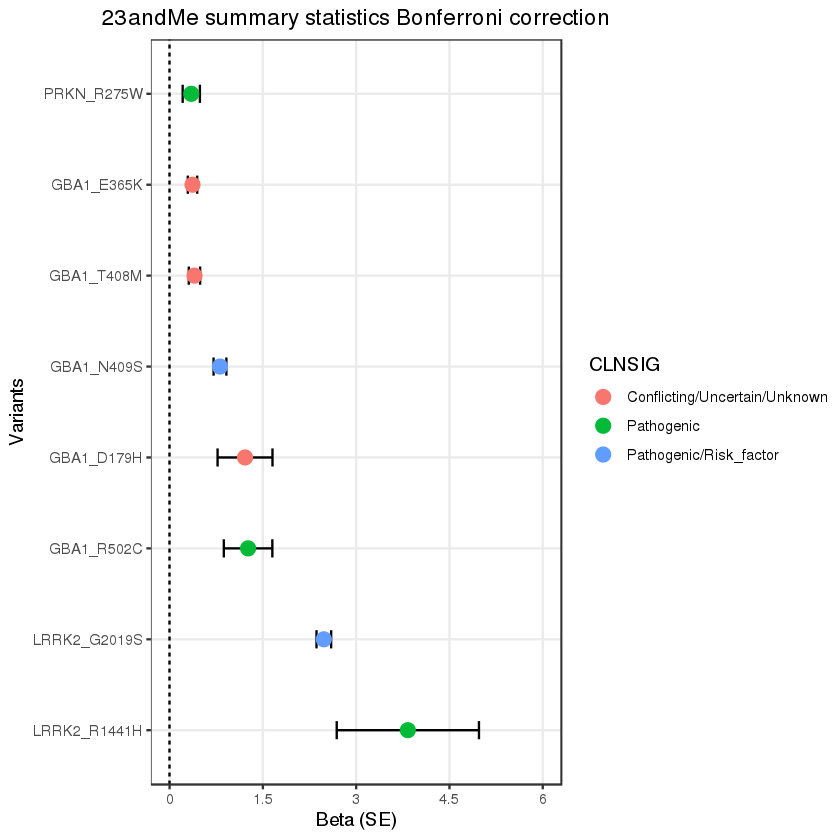

In [95]:
# Forest plot Bonferroni BETA AND SE
Plot_Bon = ggplot(andme_hits, mapping = aes(x= log(OR), y = reorder(VariantName, -log(OR))))+
  geom_vline(aes(xintercept =log(1)), size = .5, linetype = "dashed")+
  geom_errorbarh(aes(xmax = log(OR)+1.96*stderr, xmin = log(OR)-1.96*stderr), size = .5, height = .2) +
  geom_point(size = 3.5, aes(color = CLNSIG)) +
  scale_x_continuous(breaks = seq(0,6,1.5), labels = seq(0,6,1.5), limits = c(0,6)) +
  theme_bw()+
  theme(panel.grid.minor = element_blank()) +
  ylab("Variants")+
  xlab("Beta (SE)")+
  ggtitle("23andMe summary statistics Bonferroni correction")+
  theme(plot.title = element_text(hjust=0.5))

#ggsave("./Plots_Manuscript/Forest_plot_8_Bonferroni_beta_SE.png", Plot_Bon, width = 10, height = 5, dpi=300, units = "in")

Plot_Bon

In [97]:
andme_hits = andme_hits %>% mutate(PD_assoc = if_else(grepl("Parkinson", CLNDN), "PD associated", "Not PD associated"))
andme_hits$PD_assoc[andme_hits$VariantName == "GBA1_E365K"] <- "PD associated"

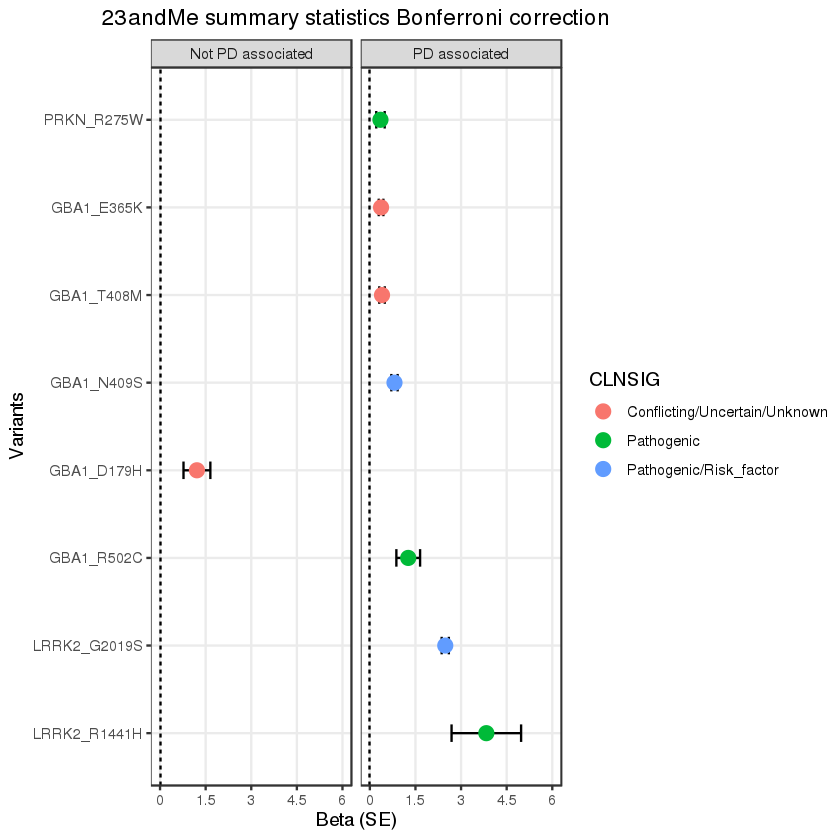

In [98]:
# Forest plot Bonferroni BETA AND SE - GROUPED ASSOC PD

Plot_Bon_group = ggplot(andme_hits, mapping = aes(x= log(OR), y = reorder(VariantName, -log(OR))))+
  geom_vline(aes(xintercept =log(1)), size = .5, linetype = "dashed")+
  geom_errorbarh(aes(xmax = log(OR)+1.96*stderr, xmin = log(OR)-1.96*stderr), size = .5, height = .2) +
  geom_point(size = 3.5, aes(color = CLNSIG)) +
  scale_x_continuous(breaks = seq(0,6,1.5), labels = seq(0,6,1.5), limits = c(0,6)) +
  theme_bw()+
  facet_grid(~PD_assoc)+
  theme(panel.grid.minor = element_blank()) +
  ylab("Variants")+
  xlab("Beta (SE)")+
  ggtitle("23andMe summary statistics Bonferroni correction")+
  theme(plot.title = element_text(hjust=0.5))

# ggsave("./Plots_Manuscript/Forest_plot_8_Bonferroni_beta_SE_PD_assoc.png", Plot_Bon_group, width = 10, height = 5, dpi=300, units = "in")

Plot_Bon_group

## 2.4 Enough power

In [99]:
andme_hits %>% select(VariantName, PD_assoc, CLNSIG, assay.name, L95, OR, U95, MAF_23, FREQ,Power_Over80) %>% arrange(-OR) %>% rename("rsID" = assay.name)

colnames(andme_hits)

VariantName,PD_assoc,CLNSIG,rsID,L95,OR,U95,MAF_23,FREQ,Power_Over80
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
LRRK2_R1441H,PD associated,Pathogenic,rs34995376,14.693927,46.104921,144.662740,3.466037e-06,3.466037e-06,NO
LRRK2_G2019S,PD associated,Pathogenic/Risk_factor,rs34637584,10.617323,11.942566,13.433224,6.261837e-04,6.261837e-04,YES
GBA1_R502C,PD associated,Pathogenic,rs80356771,2.391989,3.533227,5.218960,NA,1.992936e-04,NO
GBA1_D179H,Not PD associated,Conflicting/Uncertain/Unknown,rs147138516,2.163335,3.363911,5.230767,NA,1.240645e-04,NO
GBA1_N409S,PD associated,Pathogenic/Risk_factor,rs76763715,2.029070,2.248579,2.491835,NA,3.111430e-03,NO
GBA1_T408M,PD associated,Conflicting/Uncertain/Unknown,rs75548401,1.362503,1.492278,1.634414,NA,6.850154e-03,NO
GBA1_E365K,PD associated,Conflicting/Uncertain/Unknown,rs2230288,1.340685,1.445835,1.559232,NA,1.182293e-02,NO
PRKN_R275W,PD associated,Pathogenic,rs34424986,1.234277,1.417634,1.628229,2.492703e-03,2.492703e-03,YES


[1] "CHR.BP"                  "REF_old"                
 [3] "ALT_old"                 "position"               
 [5] "Gene"                    "assay.name"             
 [7] "ExonicFunc.refGene"      "VariantName"            
 [9] "CLNDN"                   "CLNREVSTAT"             
[11] "CLNSIG"                  "scaffold"               
[13] "Allele1"                 "Allele2"                
[15] "pvalue"                  "pval.unadj"             
[17] "effect_old"              "stderr"                 
[19] "pass"                    "src"                    
[21] "dose.b"                  "AA.0"                   
[23] "AB.0"                    "BB.0"                   
[25] "im.num.0"                "dose.b.0"               
[27] "AA.1"                    "AB.1"                   
[29] "BB.1"                    "dose.b.1"               
[31] "im.num.1"                "is.v1"                  
[33] "is.v2"                   "is.v3"                  
[35] "is.v4"                   "is.v5"                  
[37] "gt.rate"                 "hw.p.value"             
[39] "p.date"                  "freq.b"                 
[41] "avg.rsqr"                "min.rsqr"               
[43] "p.batch"                 "N_controls"             
[45] "N_cases"                 "N_INFORMATIVE"          
[47] "MarkerName"              "alternative_allele"     
[49] "effect_allele"           "freq.a"                 
[51] "FREQ_old"                "REF"                    
[53] "ALT"                     "FREQ"                   
[55] "Flip"                    "effect"                 
[57] "Effectv2"                "OR"                     
[59] "L95"                     "U95"                    
[61] "MAF_23"                  "MAF_NFE"                
[63] "Power_at_alpha005_OR1.5" "Power_at_alpha005_OR2"  
[65] "Power_at_alpha005_OR3"   "Power_Over80"           
[67] "PD_assoc"

## 2.5 Common variant statistics

In [100]:
andme_hits %>% filter(VariantName == "GBA1_E365K" | VariantName == "LRRK2_G2019S") %>% select(VariantName, L95, OR, U95, MAF_23)

VariantName,L95,OR,U95,MAF_23
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
GBA1_E365K,1.340685,1.445835,1.559232,NA
LRRK2_G2019S,10.617323,11.942566,13.433224,0.0006261837


# 3. Meta-analysis

## 3.1 Load in data

In [21]:
meta3 = fread("Meta_results_679_AMP_UKB_23andMe_annotation_QC.txt")
head(meta3)

colnames(meta3)
dim(meta3)

MarkerName,Allele1,Allele2,Freq1,FreqSE,MinFreq,MaxFreq,Effect,StdErr,P-value,⋯,AF_fin,AF_asj,AF_oth,non_topmed_AF_popmax,non_neuro_AF_popmax,non_cancer_AF_popmax,controls_AF_popmax,VariantName,CHR.BP,QC
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
chr1:20638104,a,c,1.0000,0.0000,1.0000,1.0000,1.0083,18.4693,0.9565,⋯,.,.,.,.,.,.,.,PINK1_A217D,chr1:20638104,FAIL
chr22:38112571,a,c,0.9999,0.0000,0.9999,0.9999,-0.3509,0.6857,0.6088,⋯,.,.,.,.,.,.,.,PLA2G6_D737Y,chr22:38112571,FAIL
chr3:195867623,t,c,0.9823,0.0011,0.9802,0.9847,-0.0111,0.0313,0.7225,⋯,0.0066,0,0.0111,0.0257,0.0250,.,0.0295,TNK2_R877H,chr3:195867623,PASS
chr1:155235727,c,g,0.0001,0.0000,0.0001,0.0001,0.1939,0.4011,0.6289,⋯,0,0,0,0.0007,0.0006,.,0.0011,GBA_D448H,chr1:155235727,PASS
chr15:89318617,t,c,1.0000,0.0000,1.0000,1.0000,-4.0112,2.3039,0.08167,⋯,.,.,.,.,.,.,.,POLG_E1136K,chr15:89318617,FAIL
chr2:232791124,a,t,0.9994,0.0000,0.9994,0.9996,-0.1359,0.1863,0.4657,⋯,0,0.0069,0,0.0013,0.0011,.,0.0024,GIGYF2_D349E,chr2:232791124,PASS


[1] "MarkerName"           "Allele1"              "Allele2"             
 [4] "Freq1"                "FreqSE"               "MinFreq"             
 [7] "MaxFreq"              "Effect"               "StdErr"              
[10] "P-value"              "Direction"            "HetISq"              
[13] "HetChiSq"             "HetDf"                "HetPVal"             
[16] "End"                  "Ref"                  "Alt"                 
[19] "Func.refGene"         "Gene"                 "GeneDetail.refGene"  
[22] "ExonicFunc.refGene"   "AAChange"             "avsnp150"            
[25] "CLNALLELEID"          "CLNDN"                "CLNDISDB"            
[28] "CLNREVSTAT"           "CLNSIG"               "AF"                  
[31] "AF_popmax"            "AF_male"              "AF_female"           
[34] "AF_raw"               "AF_afr"               "AF_sas"              
[37] "AF_amr"               "AF_eas"               "AF_nfe"              
[40] "AF_fin"               "AF_asj"               "AF_oth"              
[43] "non_topmed_AF_popmax" "non_neuro_AF_popmax"  "non_cancer_AF_popmax"
[46] "controls_AF_popmax"   "VariantName"          "CHR.BP"              
[49] "QC"

[1] 679  49

In [22]:
# check file for one variant
# edit gene name
meta3$Gene[meta3$Gene == "FBXO7;FBXO7"] <- "FBXO7"
meta3$Gene[meta3$Gene == "GBA"] <- "GBA1"
meta3$VariantName = gsub("GBA","GBA1",meta3$VariantName) 
meta3 %>% filter(VariantName == "LRRK2_G2019S") %>% select(VariantName,Direction)

VariantName,Direction
<chr>,<chr>
LRRK2_G2019S,---


## 3.2 How many genes and variants per gene?

In [23]:
Genelist = meta3 %>% group_by(Gene) %>% tally() %>% arrange(desc(n)) %>% rename("Number of variants" = n)
dim(Genelist)
#png("./Plots_Manuscript/List_of_genes_table.png", width=400,height=900,bg = "white")
# grid.table(Genelist)
dev.off()

head(Genelist)

# how many variants per gene?
genesMeta_679 = meta3 %>% group_by(Gene) %>% tally() %>% mutate(perc = n/sum(n)*100) %>% arrange(-n)

genelist = ggplot(genesMeta_679,
       aes(x = n,
           y = reorder(Gene, n)
       )
) +
  theme_bw()+
  ggtitle("List of variants per gene")+
  theme(plot.title = element_text(hjust=0.5))+
  scale_fill_brewer(palette = "Pastel1")+
  labs(title="List of variants per gene", 
       x="Number of variants per gene", y = "Gene name")+
  geom_col()

genelist

# ggsave("./Plots_Manuscript/679_variants_per_gene.png", genelist, width = 8, height = 5, dpi=300, units = "in")

[1] 31  2

null device 
          1

Gene,Number of variants
<chr>,<int>
POLG,87
LRRK2,86
VPS13C,85
GBA1,57
PLA2G6,55
DNAJC13,38


## 3.3 Clinical Significance

In [24]:
meta3$CLNSIG[meta3$CLNSIG == "Likely_pathogenic"] <- "Pathogenic"
meta3$CLNSIG[meta3$CLNSIG == "Pathogenic/Likely_pathogenic"] <- "Pathogenic"
meta3$CLNSIG[meta3$CLNSIG == "Likely_benign"] <- "Benign"
meta3$CLNSIG[meta3$CLNSIG == "Benign/Likely_benign"] <- "Benign"
meta3$CLNSIG[meta3$CLNSIG == "Uncertain_significance"] <- "Conflicting/Uncertain/Unknown"
meta3$CLNSIG[meta3$CLNSIG == "Conflicting_interpretations_of_pathogenicity"] <- "Conflicting/Uncertain/Unknown"
meta3$CLNSIG[meta3$CLNSIG == "."] <- "Conflicting/Uncertain/Unknown"
meta3$CLNSIG[meta3$CLNSIG == "Conflicting_interpretations_of_pathogenicity|_risk_factor"] <- "Conflicting/Uncertain/Unknown"
meta3$CLNSIG[meta3$CLNSIG == "Pathogenic/Likely_pathogenic|_risk_factor"] <- "Pathogenic/Risk_factor"
meta3$CLNSIG[meta3$CLNSIG == "Pathogenic|_risk_factor"] <- "Pathogenic/Risk_factor"  
meta3$CLNSIG[meta3$CLNSIG == "risk_factor"] <- "Risk_factor"


## 3.4 Add more stats

In [25]:
meta3_1 = meta3 %>% mutate(Effectv2 = if_else(Effect <0, abs(Effect), Effect))
meta3_1 = meta3_1 %>% mutate(OR = exp(Effectv2), L95 = exp(Effectv2 - 1.96*StdErr), U95 = exp(Effectv2 + 1.96*StdErr))
meta3_1$U95 = as.numeric(meta3_1$U95)

In [26]:
meta3_1 %>% filter(avsnp150 == "rs35870237") %>% select(OR, L95, U95, 'P-value')

OR,L95,U95,P-value
<dbl>,<dbl>,<dbl>,<chr>
21.4109,3.969706,115.4812,0.0003658


## 3.5 Join power calculation on meta file

In [31]:
OR2_3 = fread("Power_file_OR1_OR2_OR3_Jan5th2023.txt")
OR2_3 = OR2_3 %>% select(Chr, Start, VariantName, MAF_23, MAF_NFE, Power_at_alpha005_OR1.5, Power_at_alpha005_OR2, Power_at_alpha005_OR3) %>% unite(MarkerName, c("Chr", "Start"), sep = ":")

OR2_3$VariantName = gsub("GBA","GBA1",OR2_3$VariantName) 
# joinOR2_3
meta3_power = left_join(meta3_1, OR2_3)
meta3 = meta3_power

Joining, by = c("MarkerName", "VariantName")


## 3.6 how many p<0.05?

In [32]:
class(meta3$`P-value`)
meta3$`P-value` = as.numeric(meta3$`P-value`)
meta3 %>% filter(`P-value` < 0.05) %>% tally()
# 68

[1] "character"

n
<int>
68


In [33]:
# check which genes
meta3 %>% filter(`P-value` < 0.05) %>% group_by(Gene) %>% tally() %>% arrange(-n)

Gene,n
<chr>,<int>
GBA1,16
LRRK2,9
PLA2G6,7
VPS13C,7
ATP13A2,4
EIF4G1,4
PINK1,4
PRKN,4
DNAJC13,3


In [34]:
meta3 %>% filter(`P-value` < 0.05 & Gene == "GBA1") %>% select(VariantName, OR, L95, U95, `P-value`, CLNDN) %>% group_by(grepl("arkinson", CLNDN)) %>% ungroup() %>% arrange(-OR)

VariantName,OR,L95,U95,P-value,CLNDN,"grepl(""arkinson"", CLNDN)"
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>
GBA1_D419A,3401.255816,8.919144,1.297046e+06,7.328e-03,.,FALSE
GBA1_S146L,1624.734993,58.437628,4.517233e+04,1.313e-05,Gaucher_disease_type_I|Gaucher_disease|not_provided,FALSE
GBA1_D354H,100.886891,3.567296,2.853187e+03,6.812e-03,Gaucher_disease|not_specified|not_provided,FALSE
GBA1_R398Q,13.536639,1.159912,1.579780e+02,3.768e-02,.,FALSE
GBA1_K118N,10.234865,1.314021,7.971900e+01,2.636e-02,Gaucher_disease_type_I|Gaucher_disease_type_III|not_provided,FALSE
GBA1_N431I,7.849894,1.004076,6.137067e+01,4.955e-02,.,FALSE
GBA1_T362I,5.488198,1.734821,1.736221e+01,3.759e-03,Gaucher_disease_type_I|Gaucher_disease_type_II|Gaucher_disease,FALSE
GBA1_V433L,4.177446,1.989804,8.770238e+00,1.581e-04,"Lewy_body_dementia|Parkinson_disease,_late-onset|Gaucher_disease_type_I|Gaucher_disease_type_II|Gaucher_disease_type_III|Gaucher_disease_type_3C|Gaucher_disease,_perinatal_lethal|Gaucher_disease|not_provided",TRUE
GBA1_R502C,3.798856,2.660122,5.425055e+00,2.145e-13,"Lewy_body_dementia|Parkinson_disease,_late-onset|Gaucher_disease_type_I|Gaucher_disease_type_II|Gaucher_disease_type_III|Gaucher_disease_type_3C|Gaucher_disease,_perinatal_lethal|Gaucher_disease|not_provided",TRUE


In [35]:
## which of these GBA have been PD variants
meta3 %>% filter(`P-value` < 0.05 & Gene == "GBA1" & grepl("arkinson", CLNDN)) %>% select(VariantName, avsnp150, CLNSIG, OR, L95, U95, `P-value`, CLNDN) %>% arrange(-OR)

VariantName,avsnp150,CLNSIG,OR,L95,U95,P-value,CLNDN
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
GBA1_V433L,rs80356769,Pathogenic,4.177446,1.989804,8.770238,1.581e-04,"Lewy_body_dementia|Parkinson_disease,_late-onset|Gaucher_disease_type_I|Gaucher_disease_type_II|Gaucher_disease_type_III|Gaucher_disease_type_3C|Gaucher_disease,_perinatal_lethal|Gaucher_disease|not_provided"
GBA1_R502C,rs80356771,Pathogenic,3.798856,2.660122,5.425055,2.145e-13,"Lewy_body_dementia|Parkinson_disease,_late-onset|Gaucher_disease_type_I|Gaucher_disease_type_II|Gaucher_disease_type_III|Gaucher_disease_type_3C|Gaucher_disease,_perinatal_lethal|Gaucher_disease|not_provided"
GBA1_R296Q,rs78973108,Pathogenic,3.711737,2.122316,6.491489,4.258e-06,"Lewy_body_dementia|Parkinson_disease,_late-onset|Gaucher_disease_type_I|Gaucher_disease_type_II|Gaucher_disease_type_III|Gaucher_disease_type_3C|Gaucher_disease,_perinatal_lethal|Gaucher_disease|not_provided"
GBA1_N409S,rs76763715,Pathogenic/Risk_factor,2.260306,2.046494,2.496456,3.305e-58,"Thrombocytopenia|Abnormal_bleeding|Rigidity|Akinesia|Parkinson_disease|Lewy_body_dementia|Parkinson_disease,_late-onset|Gaucher_disease_type_I|Gaucher_disease_type_II|Gaucher_disease_type_III|Gaucher_disease_type_3C|Gaucher_disease,_perinatal_lethal|Gaucher_disease|Dementia,_Lewy_body,_susceptibility_to|not_provided"
GBA1_T408M,rs75548401,Conflicting/Uncertain/Unknown,1.475062,1.357434,1.602883,4.868e-20,"Parkinson_disease,_late-onset|Gaucher_disease,_perinatal_lethal|Gaucher_disease|not_specified|not_provided"


In [36]:
## which of these LRRK2 have been PD variants
meta3 %>% filter(`P-value` < 0.05 & Gene == "LRRK2" & grepl("arkinson", CLNDN)) %>% select(VariantName, CLNSIG, avsnp150, OR, L95, U95, `P-value`, CLNDN) %>% arrange(-OR)

VariantName,CLNSIG,avsnp150,OR,L95,U95,P-value,CLNDN
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
LRRK2_R1441H,Pathogenic,rs34995376,43.034409,13.826292,133.944830,8.342e-11,"Parkinson_disease_8,_autosomal_dominant"
LRRK2_I2020T,Pathogenic,rs35870237,21.410897,3.969706,115.481229,3.658e-04,"Parkinson_disease_8,_autosomal_dominant|not_provided"
LRRK2_G2019S,Pathogenic/Risk_factor,rs34637584,11.761130,10.480873,13.197772,0.000e+00,"Parkinson_disease,_late-onset|Parkinson_disease_8,_autosomal_dominant|Young-onset_Parkinson_disease|Inborn_genetic_diseases|not_provided"
LRRK2_N238I,Conflicting/Uncertain/Unknown,rs28365216,9.434753,1.532187,58.096417,1.552e-02,"Parkinson_disease_8,_autosomal_dominant"
LRRK2_L1795F,Conflicting/Uncertain/Unknown,rs111910483,2.486559,1.648537,3.750586,1.397e-05,"Parkinson_disease_8,_autosomal_dominant|not_provided"
LRRK2_R793M,Conflicting/Uncertain/Unknown,rs35173587,1.550380,1.037992,2.315700,3.220e-02,"Parkinson_disease_8,_autosomal_dominant|not_provided"
LRRK2_R1325Q,Conflicting/Uncertain/Unknown,rs72546338,1.513916,1.025972,2.233925,3.670e-02,"Parkinson_disease_8,_autosomal_dominant|not_provided"
LRRK2_E334K,Conflicting/Uncertain/Unknown,rs78501232,1.374789,1.064099,1.776192,1.492e-02,"Parkinson_disease_8,_autosomal_dominant|not_specified|not_provided"


## 3.7 Variants with enough power

In [37]:
meta3$Power_Over80[meta3$Power_at_alpha005_OR1.5 > 0.8] <- "YES"
meta3$Power_Over80[meta3$Power_at_alpha005_OR3 > 0.8] <- "YES"
#meta3$Power_Over80[meta3$CLNSIG == "Pathogenic" & meta3$Power_at_alpha005_OR3>0.8] <- "YES"
#meta3$Power_Over80[meta3$CLNSIG == "Pathogenic/Risk_factor" & meta3$Power_at_alpha005_OR3>0.8] <- "YES"

meta3 %>% filter(Power_at_alpha005_OR1.5 > 0.8) %>% tally() #n=91

n
<int>
91


In [38]:
# how many variants had enough power
meta3 %>% filter(Power_Over80 == "YES") %>% tally() #257 with all 3 ORs

#write.table(meta3, "File_for_power_results_meta.txt", row.names =F, sep = "\t", quote = F)

n
<int>
257


In [39]:
dim(meta3)

# how many have OR1.5 calculated
meta3 %>% filter(!is.na(Power_at_alpha005_OR1.5)) %>% tally()

meta3 %>% group_by(!is.na(Power_at_alpha005_OR1.5)) %>% tally()

[1] 679  59

n
<int>
669


!is.na(Power_at_alpha005_OR1.5),n
<lgl>,<int>
FALSE,10
TRUE,669


In [40]:
# how many have OR1.5 calculated but not OR2
meta3 %>% filter(!is.na(Power_at_alpha005_OR3) & is.na(Power_at_alpha005_OR2)) %>% tally()

n
<int>
0


In [41]:
# how mamy have OR1.5 calculated and are pathogenic or risk facotr
meta3 %>% filter(!is.na(Power_at_alpha005_OR1.5) & CLNSIG == "Pathogenic") %>% tally()
meta3 %>% filter(!is.na(Power_at_alpha005_OR1.5) & CLNSIG == "Pathogenic/Risk_factor") %>% tally()
109+2

n
<int>
109


n
<int>
2


[1] 111

In [42]:
# how many variants had enough power but p>0.05
class(meta3$`P-value`)
meta3$`P-value` = as.numeric(meta3$`P-value`)

meta3 %>% filter(Power_Over80 == "YES" & `P-value` >0.05) %>% tally() #231

[1] "numeric"

n
<int>
231


In [43]:
# how many genes in that list? #28
meta3 %>% filter(Power_Over80 == "YES" & `P-value` >0.05) %>% group_by(Gene) %>% tally() %>% arrange(-n)

Gene,n
<chr>,<int>
VPS13C,40
POLG,28
DNAJC13,21
ATP13A2,17
EIF4G1,17
LRRK2,17
PLA2G6,17
GIGYF2,14
LRP10,11


In [44]:
# write into file
class(meta3$`P-value`)
#meta3_enoughpower_notsig$`P-value` = as.numeric(meta3_enoughpower_notsig$`P-value`)
meta3_enoughpower_notsig = meta3 %>% filter(Power_Over80 == "YES" & `P-value` >0.05)%>% select(MarkerName, Ref, Alt, avsnp150, VariantName, Gene, CLNDN, CLNSIG, MAF_23, MAF_NFE, Power_at_alpha005_OR1.5, Power_at_alpha005_OR2,Power_at_alpha005_OR3, Power_Over80, Effect, StdErr, L95, OR, U95, 'P-value') 

dim(meta3_enoughpower_notsig)
#write.table(meta3_enoughpower_notsig, "Variants_meta3_enoughPower_notsig.txt", row.names =F, sep ="\t", quote =F)

[1] "numeric"

[1] 231  20

In [45]:
# Clinical significance
meta3_enoughpower_notsig %>% group_by(CLNSIG) %>% tally()%>% mutate(perc =n/sum(n)*100) %>% arrange(-n)

CLNSIG,n,perc
<chr>,<int>,<dbl>
Conflicting/Uncertain/Unknown,171,74.025974
Benign,51,22.077922
Pathogenic,6,2.597403
Risk_factor,3,1.298701


In [46]:
# how many associated with PD?
meta3_enoughpower_notsig %>% group_by(grepl("arkinson", CLNDN)) %>% tally() %>% mutate(perc =n/sum(n)*100)
# 57 variants previously associated with PD

"grepl(""arkinson"", CLNDN)",n,perc
<lgl>,<int>,<dbl>
FALSE,174,75.32468
TRUE,57,24.67532


In [47]:
# clinical significance of those 34?
meta3_enoughpower_notsig %>% filter(grepl("arkinson", CLNDN)) %>% group_by(CLNSIG) %>% tally() %>% mutate(perc = n/sum(n)) %>% arrange(-n)


CLNSIG,n,perc
<chr>,<int>,<dbl>
Conflicting/Uncertain/Unknown,52,0.91228070
Risk_factor,3,0.05263158
Pathogenic,2,0.03508772


In [48]:
# Which ones are the with PD associated ones, that are pathogenic?
meta3_enoughpower_notsig %>% filter(grepl("arkinson", CLNDN) & CLNSIG == "Pathogenic" | grepl("arkinson", CLNDN) & CLNSIG == "Risk_factor") %>% select(MarkerName, Ref, Alt, avsnp150, VariantName, CLNDN, CLNSIG, MAF_23, MAF_NFE, Power_at_alpha005_OR1.5, Power_at_alpha005_OR2, Effect, StdErr, L95, OR, U95, `P-value`)


MarkerName,Ref,Alt,avsnp150,VariantName,CLNDN,CLNSIG,MAF_23,MAF_NFE,Power_at_alpha005_OR1.5,Power_at_alpha005_OR2,Effect,StdErr,L95,OR,U95,P-value
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr2:232794835,A,C,rs116074753,GIGYF2_N457T,Parkinson_disease_11,Risk_factor,0.0006183822,0.0006,0.5839728,0.9725334,0.1876,0.2307,0.7675344,1.206351,1.896049,0.41610
chr2:232747740,A,G,rs72554080,GIGYF2_N56S,Parkinson_disease_11,Risk_factor,0.0005322246,0.0004,0.5220182,0.9494063,-0.5189,0.2776,0.9751188,1.680178,2.895032,0.06159
chrX:121049176,T,G,rs9697983,GLUD2_S498A,"Parkinson_disease,_late-onset",Pathogenic,0.0228635182,0.0254,1.0000000,1.0000000,0.0182,0.0237,0.9721434,1.018367,1.066788,0.44300
chr1:20644651,C,T,rs74315359,PINK1_T313M,"Parkinson_disease_6,_autosomal_recessive_early-onset",Pathogenic,0.0001748868,0.0000,0.2113945,0.5413621,-0.2626,0.3621,0.6394697,1.300306,2.644061,0.46840
chr3:184327401,G,A,rs112176450,EIF4G1_R1206H,Parkinson_disease_18,Risk_factor,0.0003157987,0.0001,0.3420206,0.7916893,-0.2867,0.3001,0.7397108,1.332025,2.398626,0.33940


In [49]:
# Which ones are the with PD associated ones, that are risk facotrs?
meta3_enoughpower_notsig %>% filter(grepl("arkinson", CLNDN) & CLNSIG == "Risk_factor") %>% select(MarkerName, Ref, Alt, avsnp150, VariantName, CLNDN, CLNSIG, MAF_23, MAF_NFE, Power_at_alpha005_OR1.5, Power_at_alpha005_OR2, Effect, StdErr, L95, OR, U95, `P-value`)


MarkerName,Ref,Alt,avsnp150,VariantName,CLNDN,CLNSIG,MAF_23,MAF_NFE,Power_at_alpha005_OR1.5,Power_at_alpha005_OR2,Effect,StdErr,L95,OR,U95,P-value
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr2:232794835,A,C,rs116074753,GIGYF2_N457T,Parkinson_disease_11,Risk_factor,0.0006183822,6e-04,0.5839728,0.9725334,0.1876,0.2307,0.7675344,1.206351,1.896049,0.41610
chr2:232747740,A,G,rs72554080,GIGYF2_N56S,Parkinson_disease_11,Risk_factor,0.0005322246,4e-04,0.5220182,0.9494063,-0.5189,0.2776,0.9751188,1.680178,2.895032,0.06159
chr3:184327401,G,A,rs112176450,EIF4G1_R1206H,Parkinson_disease_18,Risk_factor,0.0003157987,1e-04,0.3420206,0.7916893,-0.2867,0.3001,0.7397108,1.332025,2.398626,0.33940


In [50]:
meta3 %>% filter(MarkerName == "chr12:40340404") %>% select(MarkerName, VariantName, OR, L95, U95, `P-value`)

MarkerName,VariantName,OR,L95,U95,P-value
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
chr12:40340404,LRRK2_I2020T,21.4109,3.969706,115.4812,0.0003658


# 4. Meta-analysis Bonferroni

## 4.1 How many pass this threshold?

In [70]:
0.05/679

[1] 7.36377e-05

In [51]:
class(meta3$`P-value`)
meta3$`P-value` = as.numeric(meta3$`P-value`)
meta3 %>% filter(`P-value`< 7.36377025036819e-05) %>% tally() #11

[1] "numeric"

n
<int>
11


In [52]:
# write file
meta_hits = meta3 %>% filter(`P-value` < 7.36377025036819e-05) 

## 4.2 Clinical significance

In [53]:
group_CLNSIG_meta = meta_hits
group_CLNSIG_meta = group_CLNSIG_meta %>% group_by(CLNSIG) %>% tally() %>% arrange(-n) %>% mutate(perc = n/sum(n)*100) %>% ungroup()
group_CLNSIG_meta

CLNSIG,n,perc
<chr>,<int>,<dbl>
Conflicting/Uncertain/Unknown,5,45.45455
Pathogenic,4,36.36364
Pathogenic/Risk_factor,2,18.18182


In [54]:
colnames(meta_hits)
meta_hits %>% arrange(CLNSIG) %>% select(VariantName, avsnp150, CLNSIG, OR, L95, U95, MAF_23) %>% arrange(OR)

[1] "MarkerName"              "Allele1"                
 [3] "Allele2"                 "Freq1"                  
 [5] "FreqSE"                  "MinFreq"                
 [7] "MaxFreq"                 "Effect"                 
 [9] "StdErr"                  "P-value"                
[11] "Direction"               "HetISq"                 
[13] "HetChiSq"                "HetDf"                  
[15] "HetPVal"                 "End"                    
[17] "Ref"                     "Alt"                    
[19] "Func.refGene"            "Gene"                   
[21] "GeneDetail.refGene"      "ExonicFunc.refGene"     
[23] "AAChange"                "avsnp150"               
[25] "CLNALLELEID"             "CLNDN"                  
[27] "CLNDISDB"                "CLNREVSTAT"             
[29] "CLNSIG"                  "AF"                     
[31] "AF_popmax"               "AF_male"                
[33] "AF_female"               "AF_raw"                 
[35] "AF_afr"                  "AF_sas"                 
[37] "AF_amr"                  "AF_eas"                 
[39] "AF_nfe"                  "AF_fin"                 
[41] "AF_asj"                  "AF_oth"                 
[43] "non_topmed_AF_popmax"    "non_neuro_AF_popmax"    
[45] "non_cancer_AF_popmax"    "controls_AF_popmax"     
[47] "VariantName"             "CHR.BP"                 
[49] "QC"                      "Effectv2"               
[51] "OR"                      "L95"                    
[53] "U95"                     "MAF_23"                 
[55] "MAF_NFE"                 "Power_at_alpha005_OR1.5"
[57] "Power_at_alpha005_OR2"   "Power_at_alpha005_OR3"  
[59] "Power_Over80"

VariantName,avsnp150,CLNSIG,OR,L95,U95,MAF_23
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
PRKN_R275W,rs34424986,Pathogenic,1.299137,1.146204,1.472474,2.492703e-03
GBA1_E365K,rs2230288,Conflicting/Uncertain/Unknown,1.437923,1.344696,1.537614,1.182293e-02
GBA1_T408M,rs75548401,Conflicting/Uncertain/Unknown,1.475062,1.357434,1.602883,6.850154e-03
GBA1_N409S,rs76763715,Pathogenic/Risk_factor,2.260306,2.046494,2.496456,3.111430e-03
LRRK2_L1795F,rs111910483,Conflicting/Uncertain/Unknown,2.486559,1.648537,3.750586,8.479147e-05
GBA1_D179H,rs147138516,Conflicting/Uncertain/Unknown,3.274941,2.143311,5.004052,1.240645e-04
GBA1_R296Q,rs78973108,Pathogenic,3.711737,2.122316,6.491489,1.813270e-05
GBA1_R502C,rs80356771,Pathogenic,3.798856,2.660122,5.425055,1.992936e-04
LRRK2_G2019S,rs34637584,Pathogenic/Risk_factor,11.761130,10.480873,13.197772,6.261837e-04


## 4.3 Association with PD based on clinvar

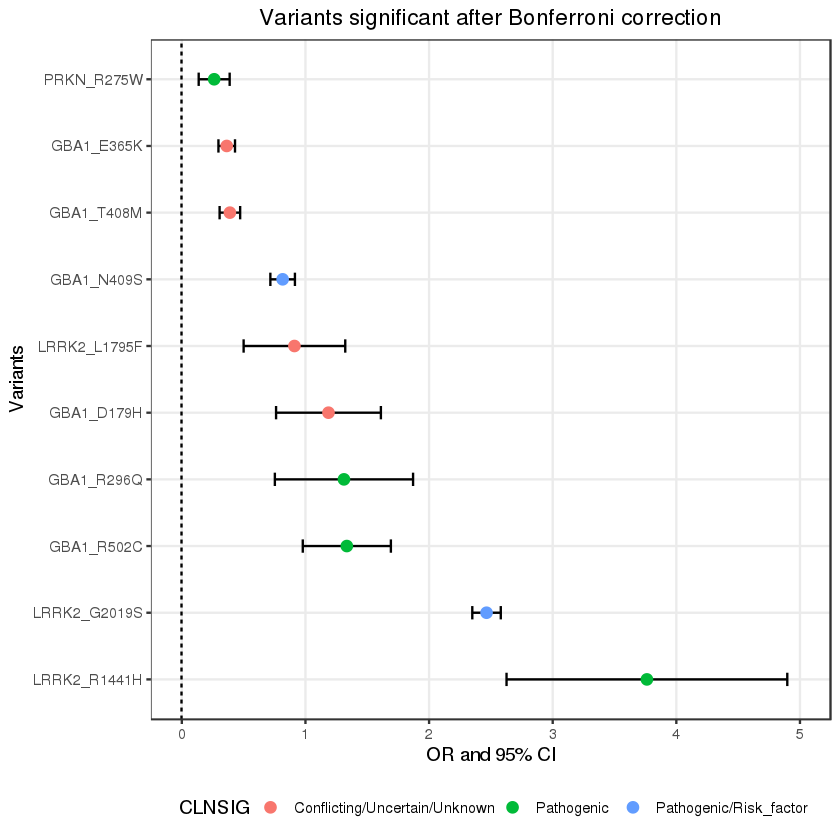

In [56]:
# Forest plot Bonferroni OR AND 95%CI
meta_hits2 = meta_hits
meta_hits2 = meta_hits2 %>% filter(VariantName != "GBA1_S146L")
#meta_hits2$OR[meta_hits2$VariantName == "GBA1_S146L"] <- NA
#meta_hits2$L95[meta_hits2$VariantName == "GBA1_S146L"] <- NA
#meta_hits2$U95[meta_hits2$VariantName == "GBA1_S146L"] <- NA

#class(meta_hits2$VariantName)
#meta_hits2$VariantName = as.factor(meta_hits2$VariantName)
#relevel(meta_hits2, ref, ...)

Plot_Bon_OR = ggplot(meta_hits2, mapping = aes(x= log(OR), y = reorder(VariantName, -OR)))+
  geom_vline(aes(xintercept =log(1)), size = .5, linetype = "dashed")+
  geom_errorbarh(aes(xmax = log(U95), xmin = log(L95)), size = .5, height = .2) +
  geom_point(size = 2.5, aes(color = CLNSIG)) +
  scale_x_continuous(breaks = seq(0,5,1), labels = seq(0,5,1), limits = c(0,5)) +
  theme_bw()+
  theme(panel.grid.minor = element_blank()) +
  #annotate("text", x=1.5, y=1, label= "OR=1,624, 95% CI: 58-45,172", color = 'red') +
  ylab("Variants")+
  xlab("OR and 95% CI")+
  ggtitle("Variants significant after Bonferroni correction")+
  theme(plot.title = element_text(hjust=0.5))+
  theme(plot.title = element_text(hjust=0.5),
       legend.position="bottom")

#ggsave("Forest_plot_11_Bonferroni_OR_95CI_meta_analysis_log.png", Plot_Bon_OR, width = 7, height = 5, dpi=300, units = "in")

Plot_Bon_OR

# 1 variant's CI too wide to plot, removed and added in text

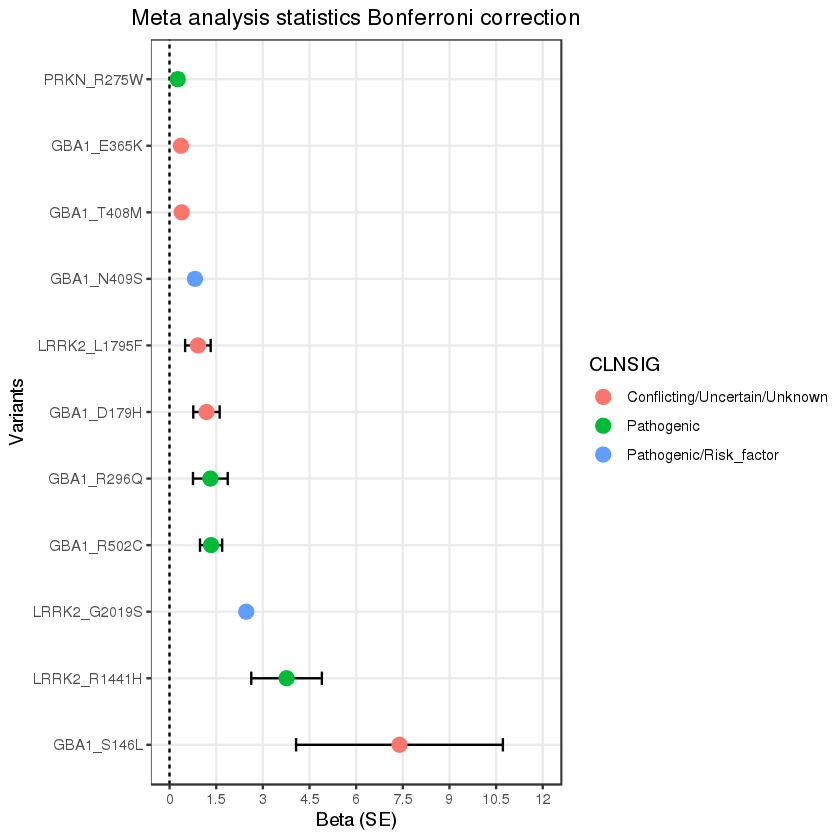

In [57]:
# Forest plot Bonferroni BETA AND SE
Plot_Bon = ggplot(meta_hits, mapping = aes(x= log(OR), y = reorder(VariantName, -log(OR))))+
  geom_vline(aes(xintercept =log(1)), size = .5, linetype = "dashed")+
  geom_errorbarh(aes(xmax = log(OR)+1.96*StdErr, xmin = log(OR)-1.96*StdErr), size = .5, height = .2) +
  geom_point(size = 3.5, aes(color = CLNSIG)) +
  scale_x_continuous(breaks = seq(0,12,1.5), labels = seq(0,12,1.5), limits = c(0,12)) +
  theme_bw()+
  theme(panel.grid.minor = element_blank()) +
  ylab("Variants")+
  xlab("Beta (SE)")+
  ggtitle("Meta analysis statistics Bonferroni correction")+
  theme(plot.title = element_text(hjust=0.5))

Plot_Bon

In [58]:
meta_hits = meta_hits %>% mutate(PD_assoc = if_else(grepl("Parkinson", CLNDN), "PD associated", "Not PD associated"))

meta_hits$PD_assoc[meta_hits$VariantName == "GBA1_E365K"] <-"PD associated"

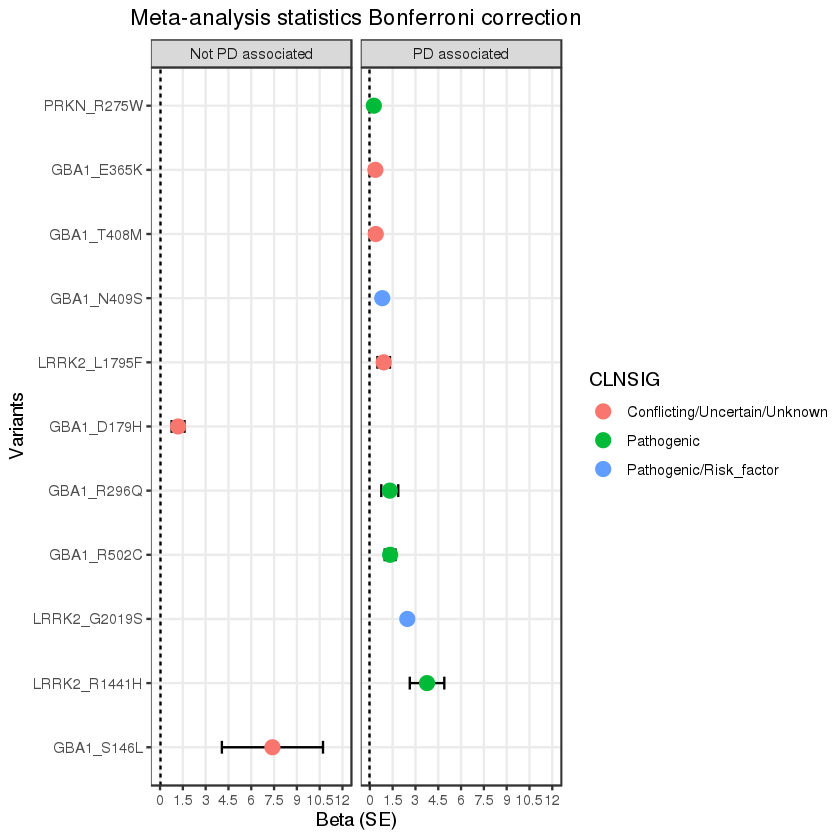

In [59]:
# Forest plot Bonferroni BETA AND SE - GROUPED
Plot_Bon_group_meta = ggplot(meta_hits, mapping = aes(x= log(OR), y = reorder(VariantName, -log(OR))))+
  geom_vline(aes(xintercept =log(1)), size = .5, linetype = "dashed")+
  geom_errorbarh(aes(xmax = log(OR)+1.96*StdErr, xmin = log(OR)-1.96*StdErr), size = .5, height = .2) +
  geom_point(size = 3.5, aes(color = CLNSIG)) +
  scale_x_continuous(breaks = seq(0,12,1.5), labels = seq(0,12,1.5), limits = c(0,12)) +
  theme_bw()+
  facet_grid(~PD_assoc)+
  theme(panel.grid.minor = element_blank()) +
  ylab("Variants")+
  xlab("Beta (SE)")+
  ggtitle("Meta-analysis statistics Bonferroni correction")+
  theme(plot.title = element_text(hjust=0.5))

# ggsave("./Plots_Manuscript/Forest_plot_11_Bonferroni_beta_SE_meta_analysis_group.png", Plot_Bon_group_meta, width = 10, height = 5, dpi=300, units = "in")

Plot_Bon_group_meta

## 4.4 Enough power

In [ ]:
meta_hits %>% group_by(Power_Over80) %>% ungroup() %>% select(VariantName ,avsnp150, L95, OR, U95, Power_Over80, MAF_23) %>% arrange(-OR) %>% rename("rsID" = avsnp150)

# 5 Compare and contrast 23andMe with meta-analysis

## 5.1 Combine in plot and table

In [121]:
andme_hits1 =andme_hits
andme_hits1$Study = "23andMe only"
andme_hits1 = andme_hits1 %>% select(VariantName, `CHR.BP`, OR, L95, U95, CLNSIG, Study)

head(andme_hits1)

VariantName,CHR.BP,OR,L95,U95,CLNSIG,Study
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
GBA1_R502C,chr1:155235196,3.533227,2.391989,5.218960,Pathogenic,23andMe only
GBA1_N409S,chr1:155235843,2.248579,2.029070,2.491835,Pathogenic/Risk_factor,23andMe only
GBA1_E365K,chr1:155236376,1.445835,1.340685,1.559232,Conflicting/Uncertain/Unknown,23andMe only
LRRK2_G2019S,chr12:40340400,11.942566,10.617323,13.433224,Pathogenic/Risk_factor,23andMe only
GBA1_T408M,chr1:155236246,1.492278,1.362503,1.634414,Conflicting/Uncertain/Unknown,23andMe only
GBA1_D179H,chr1:155238570,3.363911,2.163335,5.230767,Conflicting/Uncertain/Unknown,23andMe only


In [122]:
meta_hits1 =meta_hits
meta_hits1$Study = "Meta-analysis"

meta_hits1 = meta_hits1 %>% select(VariantName, `CHR.BP`, OR, L95, U95, CLNSIG, Study)
head(meta_hits1)

VariantName,CHR.BP,OR,L95,U95,CLNSIG,Study
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
LRRK2_L1795F,chr12:40322386,2.486559,1.648537,3.750586,Conflicting/Uncertain/Unknown,Meta-analysis
GBA1_N409S,chr1:155235843,2.260306,2.046494,2.496456,Pathogenic/Risk_factor,Meta-analysis
GBA1_E365K,chr1:155236376,1.437923,1.344696,1.537614,Conflicting/Uncertain/Unknown,Meta-analysis
GBA1_R296Q,chr1:155237453,3.711737,2.122316,6.491489,Pathogenic,Meta-analysis
LRRK2_R1441H,chr12:40310435,43.034409,13.826292,133.944830,Pathogenic,Meta-analysis
GBA1_S146L,chr1:155239633,1624.734993,58.437628,45172.329538,Conflicting/Uncertain/Unknown,Meta-analysis


In [135]:
# merge them
all_join = full_join(meta_hits1, andme_hits1)
head(all_join)

Joining, by = c("VariantName", "CHR.BP", "OR", "L95", "U95", "CLNSIG", "Study")


VariantName,CHR.BP,OR,L95,U95,CLNSIG,Study
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
LRRK2_L1795F,chr12:40322386,2.486559,1.648537,3.750586,Conflicting/Uncertain/Unknown,Meta-analysis
GBA1_N409S,chr1:155235843,2.260306,2.046494,2.496456,Pathogenic/Risk_factor,Meta-analysis
GBA1_E365K,chr1:155236376,1.437923,1.344696,1.537614,Conflicting/Uncertain/Unknown,Meta-analysis
GBA1_R296Q,chr1:155237453,3.711737,2.122316,6.491489,Pathogenic,Meta-analysis
LRRK2_R1441H,chr12:40310435,43.034409,13.826292,133.944830,Pathogenic,Meta-analysis
GBA1_S146L,chr1:155239633,1624.734993,58.437628,45172.329538,Conflicting/Uncertain/Unknown,Meta-analysis


In [137]:
plot = ggplot(all_join, mapping = aes(x= log(OR), y = reorder(VariantName, -log(OR))))+
  geom_vline(aes(xintercept =log(1)), size = .5, linetype = "dashed")+
  geom_errorbarh(aes(xmax = log(U95), xmin = log(L95)), size = .5, height = .2) +
  geom_point(size = 3.5, aes(color = CLNSIG)) +
  scale_x_continuous(breaks = seq(0,12,1.5), labels = seq(0,12,1.5), limits = c(0,12)) +
  theme_bw()+
  facet_grid(~Study)+
  theme(panel.grid.minor = element_blank()) +
  ylab("Variants")+
  xlab("OR (95% CI)")+
  ggtitle("Variants passing Bonferroni correction")+
  theme(plot.title = element_text(hjust=0.5))+
  theme(plot.title = element_text(hjust=0.5),
       legend.position="bottom")

#ggsave("11variants_23adnMe_vs_meta_analysis.png", plot, width = 10, height = 5, dpi=300, units = "in")

In [ ]:
### Anti_join

In [84]:
andme_compare = andme_hits %>% select(VariantName)

In [85]:
anti = anti_join(meta_hits, andme_compare)

Joining, by = "VariantName"


In [86]:
dim(anti)

[1]  3 59

In [87]:
anti %>% select(VariantName, avsnp150, U95, OR, L95, Effect, StdErr, `P-value`, PD_assoc, CLNSIG, Direction)

VariantName,avsnp150,U95,OR,L95,Effect,StdErr,P-value,PD_assoc,CLNSIG,Direction
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
LRRK2_L1795F,rs111910483,3.750586,2.486559,1.648537,-0.9109,0.2097,1.397e-05,PD associated,Conflicting/Uncertain/Unknown,-?-
GBA_R296Q,rs78973108,6.491489,3.711737,2.122316,-1.3115,0.2852,4.258e-06,PD associated,Pathogenic,---
GBA_S146L,rs758447515,45172.329538,1624.734993,58.437628,-7.3931,1.6965,1.313e-05,Not PD associated,Conflicting/Uncertain/Unknown,?-+


## 5.2 Variants in both analyses - comparing statistics

In [88]:
meta_hits %>% filter(VariantName == "GBA_E365K" | VariantName == "LRRK2_G2019S") %>% select(VariantName, avsnp150,L95, OR, U95, MAF_23)

VariantName,avsnp150,L95,OR,U95,MAF_23
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
GBA_E365K,rs2230288,1.344696,1.437923,1.537614,0.0118229323
LRRK2_G2019S,rs34637584,10.480873,11.761130,13.197772,0.0006261837


## 5.3 Overall enough power but not significant

In [89]:
# match columns

meta3_enoughpower_notsig = fread("Variants_meta3_enoughPower_notsig.txt")
andme_enoughpower_notsig = fread("Variants_23andMeOnly_enoughPower_notsig.txt")
colnames(meta3_enoughpower_notsig)
colnames(andme_enoughpower_notsig)

[1] "MarkerName"              "Ref"                    
 [3] "Alt"                     "avsnp150"               
 [5] "VariantName"             "Gene"                   
 [7] "CLNDN"                   "CLNSIG"                 
 [9] "MAF_23"                  "MAF_NFE"                
[11] "Power_at_alpha005_OR1.5" "Power_at_alpha005_OR2"  
[13] "Power_at_alpha005_OR3"   "Power_Over80"           
[15] "Effect"                  "StdErr"                 
[17] "L95"                     "OR"                     
[19] "U95"                     "P-value"

[1] "CHR.BP"                  "REF"                    
 [3] "ALT"                     "assay.name"             
 [5] "VariantName"             "Gene"                   
 [7] "CLNDN"                   "CLNSIG"                 
 [9] "MAF_23"                  "MAF_NFE"                
[11] "Power_at_alpha005_OR1.5" "Power_at_alpha005_OR2"  
[13] "Power_at_alpha005_OR3"   "Power_Over80"           
[15] "effect"                  "stderr"                 
[17] "L95"                     "OR"                     
[19] "U95"                     "pvalue"

In [90]:
# edit files
meta_final_power = meta3_enoughpower_notsig %>% select(MarkerName, Ref, Alt, avsnp150, VariantName, Gene, CLNDN, CLNSIG, MAF_23, MAF_NFE, `Power_at_alpha005_OR1.5`, Power_at_alpha005_OR2, Power_at_alpha005_OR3, Power_Over80, Effect, StdErr, L95, OR, U95, 'P-value')  
andme_final_power = andme_enoughpower_notsig %>% select(`CHR.BP`, REF, ALT, assay.name, VariantName, Gene, CLNDN, CLNSIG, MAF_23, MAF_NFE, Power_at_alpha005_OR1.5, Power_at_alpha005_OR2, Power_at_alpha005_OR3, Power_Over80, effect, stderr, L95, OR, U95, pvalue) %>% dplyr::rename("MarkerName" = "CHR.BP", "Alt" = "ALT", "Ref" = "REF", "avsnp150" = assay.name, "Effect" = effect, "StdErr" = stderr, "P-value" = pvalue)


In [91]:
class(meta_final_power$`P-value`)
class(andme_final_power$`P-value`)

[1] "numeric"

[1] "numeric"

In [92]:
# add analysis column
meta_final_power$Analysis = "Meta-analysis"
andme_final_power$Analysis = "23andMe"

In [93]:
# add bonferroni pass 
meta_final_power = meta_final_power %>% mutate(Bonferroni = if_else(`P-value` < 7.36377025036819e-05, "YES", "NO"))
andme_final_power = andme_final_power %>% mutate(Bonferroni = if_else(`P-value` < 7.6219512195122e-05, "YES", "NO"))
meta_final_power %>% group_by(Bonferroni) %>% tally()
andme_final_power %>% group_by(Bonferroni) %>% tally()

Bonferroni,n
<chr>,<int>
NO,231


Bonferroni,n
<chr>,<int>
NO,232


In [94]:
# join files
power_join = full_join(meta_final_power, andme_final_power)
dim(andme_final_power)
dim(meta_final_power)
dim(power_join)

Joining, by = c("MarkerName", "Ref", "Alt", "avsnp150", "VariantName", "Gene",
"CLNDN", "CLNSIG", "MAF_23", "MAF_NFE", "Power_at_alpha005_OR1.5",
"Power_at_alpha005_OR2", "Power_at_alpha005_OR3", "Power_Over80", "Effect",
"StdErr", "L95", "OR", "U95", "P-value", "Analysis", "Bonferroni")


[1] 232  22

[1] 231  22

[1] 463  22

In [144]:
# how many enough power
power_join %>% group_by(Power_Over80) %>% distinct(avsnp150) %>% tally() #n=241

power_join %>% group_by(Power_Over80) %>% distinct(VariantName) %>% tally() #n=240

Power_Over80,n
<chr>,<int>
YES,241


Power_Over80,n
<chr>,<int>
YES,240


In [145]:
# how many genes?
power_join %>% group_by(Gene) %>% tally() %>% mutate(perc = n/sum(n)*100) %>% arrange(-n) #n=25

Gene,n,perc
<chr>,<int>,<dbl>
VPS13C,81,17.4946004
POLG,56,12.0950324
DNAJC13,44,9.5032397
LRRK2,36,7.7753780
EIF4G1,34,7.3434125
PLA2G6,34,7.3434125
ATP13A2,31,6.6954644
GIGYF2,27,5.8315335
LRP10,21,4.5356371


In [146]:
# some random checks
#head(andme_final_power)
power_join %>% filter(VariantName == "ATP13A2_I902F")

colnames(power_join)

MarkerName,Ref,Alt,avsnp150,VariantName,Gene,CLNDN,CLNSIG,MAF_23,MAF_NFE,⋯,Power_at_alpha005_OR3,Power_Over80,Effect,StdErr,L95,OR,U95,P-value,Analysis,Bonferroni
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
chr1:16988161,T,A,rs55708915,ATP13A2_I902F,ATP13A2,"Kufor-Rakeb_syndrome|Spastic_paraplegia_78,_autosomal_recessive|History_of_neurodevelopmental_disorder|not_provided",Conflicting/Uncertain/Unknown,0.001821771,9e-04,⋯,1,YES,0.0082000,0.1251000,0.7889944,1.008234,1.288393,0.9476000,Meta-analysis,NO
chr1:16988161,T,A,rs55708915,ATP13A2_I902F,ATP13A2,"Kufor-Rakeb_syndrome|Spastic_paraplegia_78,_autosomal_recessive|History_of_neurodevelopmental_disorder|not_provided",Conflicting/Uncertain/Unknown,0.001821771,9e-04,⋯,1,YES,-0.1992043,0.1509563,0.9078555,1.220431,1.640627,0.1753031,23andMe data,NO


[1] "MarkerName"              "Ref"                    
 [3] "Alt"                     "avsnp150"               
 [5] "VariantName"             "Gene"                   
 [7] "CLNDN"                   "CLNSIG"                 
 [9] "MAF_23"                  "MAF_NFE"                
[11] "Power_at_alpha005_OR1.5" "Power_at_alpha005_OR2"  
[13] "Power_at_alpha005_OR3"   "Power_Over80"           
[15] "Effect"                  "StdErr"                 
[17] "L95"                     "OR"                     
[19] "U95"                     "P-value"                
[21] "Analysis"                "Bonferroni"

In [ ]:
## convert to wide format

In [148]:
# first make all columns long
power_long = power_join %>%
  pivot_longer(cols = -c(MarkerName, Ref, Alt, avsnp150, VariantName, Gene, CLNDN, CLNSIG, MAF_23, MAF_NFE, Power_Over80, Analysis,Bonferroni), names_to = "Stats", values_to = "value")

In [159]:
# now wide
power_long$Analysis[power_long$Analysis == "23andMe data"] <- "23andMe"

power_wide = power_long %>% 
  pivot_wider(
    values_from = c(value),
    names_from = c(Stats, Analysis)
  )

dim(power_wide)

[1] 244  30

In [207]:
# how many variants with PD associated #61
power_wide %>% filter(grepl("arkinson", CLNDN)) %>% tally()

power_wide %>% filter(grepl("arkinson", CLNDN)) %>% group_by(avsnp150) %>% tally() %>% filter(n>1) # no rsID duplicates

PD_variants = power_wide %>% rename("rsID" = avsnp150) %>% mutate(PD_assoc = if_else(grepl("arkinson", CLNDN), "YES", "NO"))
head(PD_variants)
colnames(PD_variants)

#write.table(PD_variants, "./Tables_Manuscript/PD_variants_not_confirmed_meta_and_23andme_stats.txt", row.names =F, sep = "\t", quote =F)

n
<int>
61


avsnp150,n
<chr>,<int>


MarkerName,Ref,Alt,rsID,VariantName,Gene,CLNDN,CLNSIG,MAF_23,MAF_NFE,⋯,Power_at_alpha005_OR1.5_23andMe,Power_at_alpha005_OR2_23andMe,Power_at_alpha005_OR3_23andMe,Effect_23andMe,StdErr_23andMe,L95_23andMe,OR_23andMe,U95_23andMe,P-value_23andMe,PD_assoc
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
chr3:195867623,C,T,rs112384084,TNK2_R877H,TNK2,Parkinson_disease|not_specified,Conflicting/Uncertain/Unknown,0.0171962334,0.0170,⋯,1.0000000,1.0000000,1.0000000,0.02663703,0.03561812,0.9577443,1.026995,1.101253,0.45631211,YES
chr2:232791124,T,A,rs148277228,GIGYF2_D349E,GIGYF2,.,Conflicting/Uncertain/Unknown,0.0005705102,0.0010,⋯,0.5502498,0.9613383,0.9999882,0.17397503,0.20566624,0.7952245,1.190026,1.780832,0.40890730,NO
chr6:161785877,G,A,rs150562946,PRKN_R256C,PRKN,Neoplasm_of_ovary|Parkinson_disease_2|not_provided,Conflicting/Uncertain/Unknown,0.0008158744,0.0009,⋯,0.7035076,0.9937085,1.0000000,0.39363785,0.19128192,1.0189017,1.482364,2.156638,0.05072284,YES
chr6:162443371,G,A,rs148990138,PRKN_P37L,PRKN,Parkinson_disease_2|not_provided,Conflicting/Uncertain/Unknown,0.0003413027,0.0002,⋯,0.3648016,0.8219381,0.9976479,0.04385458,0.23935303,0.6535885,1.044830,1.670272,0.85789020,YES
chr12:40367045,G,A,rs146428335,LRRK2_R2477Q,LRRK2,"Parkinson_disease_8,_autosomal_dominant",Conflicting/Uncertain/Unknown,0.0001203310,0.0001,⋯,0.1599930,0.4021084,0.8112903,0.04769005,0.49666850,0.3962222,1.048846,2.776414,0.92535947,YES
chr1:65392454,T,A,rs145329294,DNAJC6_C441S,DNAJC6,"Parkinson_disease_19a,_juvenile-onset|not_provided",Conflicting/Uncertain/Unknown,0.0006598757,0.0006,⋯,0.6116795,0.9796818,0.9999987,-0.02033658,0.18600062,0.7087697,1.020545,1.469464,0.91193662,YES


[1] "MarkerName"                           
 [2] "Ref"                                  
 [3] "Alt"                                  
 [4] "rsID"                                 
 [5] "VariantName"                          
 [6] "Gene"                                 
 [7] "CLNDN"                                
 [8] "CLNSIG"                               
 [9] "MAF_23"                               
[10] "MAF_NFE"                              
[11] "Power_Over80"                         
[12] "Bonferroni"                           
[13] "Power_at_alpha005_OR1.5_Meta-analysis"
[14] "Power_at_alpha005_OR2_Meta-analysis"  
[15] "Power_at_alpha005_OR3_Meta-analysis"  
[16] "Effect_Meta-analysis"                 
[17] "StdErr_Meta-analysis"                 
[18] "L95_Meta-analysis"                    
[19] "OR_Meta-analysis"                     
[20] "U95_Meta-analysis"                    
[21] "P-value_Meta-analysis"                
[22] "Power_at_alpha005_OR1.5_23andMe"      
[23] "Power_at_alpha005_OR2_23andMe"        
[24] "Power_at_alpha005_OR3_23andMe"        
[25] "Effect_23andMe"                       
[26] "StdErr_23andMe"                       
[27] "L95_23andMe"                          
[28] "OR_23andMe"                           
[29] "U95_23andMe"                          
[30] "P-value_23andMe"                      
[31] "PD_assoc"

In [5]:
# make pretty table
install.packages("reactable")
library(reactable)

power = fread("./Tables_Manuscript/PD_variants_not_confirmed_meta_and_23andme_stats.txt")
colnames(power)

Installing package into ‘/spin1/home/linux/pitzv2/R/4.1/library’
(as ‘lib’ is unspecified)



[1] "MarkerName"                           
 [2] "Ref"                                  
 [3] "Alt"                                  
 [4] "rsID"                                 
 [5] "VariantName"                          
 [6] "Gene"                                 
 [7] "CLNDN"                                
 [8] "CLNSIG"                               
 [9] "MAF_23"                               
[10] "MAF_NFE"                              
[11] "Power_Over80"                         
[12] "Bonferroni"                           
[13] "Power_at_alpha005_OR1.5_Meta-analysis"
[14] "Power_at_alpha005_OR2_Meta-analysis"  
[15] "Power_at_alpha005_OR3_Meta-analysis"  
[16] "Effect_Meta-analysis"                 
[17] "StdErr_Meta-analysis"                 
[18] "L95_Meta-analysis"                    
[19] "OR_Meta-analysis"                     
[20] "U95_Meta-analysis"                    
[21] "P-value_Meta-analysis"                
[22] "Power_at_alpha005_OR1.5_23andMe"      
[23] "Power_at_alpha005_OR2_23andMe"        
[24] "Power_at_alpha005_OR3_23andMe"        
[25] "Effect_23andMe"                       
[26] "StdErr_23andMe"                       
[27] "L95_23andMe"                          
[28] "OR_23andMe"                           
[29] "U95_23andMe"                          
[30] "P-value_23andMe"                      
[31] "PD_assoc"

In [ ]:
power %>% 
  select(country, start_date, end_date, covid_deaths, 
         excess_deaths, covid_deaths, csum) %>% 
  reactable()

In [170]:
# how many pathogenic variants in both analyses at OR 1.5 #3

power_wide %>% filter(!is.na(`P-value_23andMe`) & !is.na(`P-value_Meta-analysis`) & CLNSIG == "Pathogenic" & Power_at_alpha005_OR1.5_23andMe >0.8) %>% select(VariantName, CLNSIG, CLNDN, Power_at_alpha005_OR1.5_23andMe:Power_at_alpha005_OR3_23andMe, Power_Over80)

power_join %>% filter(VariantName == "GLUD2_S498A" | VariantName == "POLG_A467T" | VariantName == "POLG_G737R") %>% select(VariantName, Analysis, avsnp150, Power_at_alpha005_OR1.5, OR, L95, U95, `P-value`)



VariantName,CLNSIG,CLNDN,Power_at_alpha005_OR1.5_23andMe,Power_at_alpha005_OR2_23andMe,Power_at_alpha005_OR3_23andMe,Power_Over80
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
POLG_A467T,Pathogenic,"POLG-related_condition|Seizures|Toe_walking|Progressive_sclerosing_poliodystrophy|Progressive_external_ophthalmoplegia_with_mitochondrial_DNA_deletions,_autosomal_recessive_1|Mitochondrial_DNA_depletion_syndrome_1_(MNGIE_type)|Sensory_ataxic_neuropathy,_dysarthria,_and_ophthalmoparesis|Mitochondrial_DNA_depletion_syndrome_4B,_MNGIE_type|Myoclonic_epilepsy_myopathy_sensory_ataxia|Hereditary_spastic_paraplegia|Autosomal_dominant_progressive_external_ophthalmoplegia_with_mitochondrial_DNA_deletions_1|Mitochondrial_disease|POLG-Related_Spectrum_Disorders|POLG-related_disorders|not_provided",0.8502723,0.9996550,1,YES
GLUD2_S498A,Pathogenic,"Parkinson_disease,_late-onset",1.0000000,1.0000000,1,YES
POLG_G737R,Pathogenic,"Seizures|Progressive_sclerosing_poliodystrophy|Progressive_external_ophthalmoplegia_with_mitochondrial_DNA_deletions,_autosomal_recessive_1|Sensory_ataxic_neuropathy,_dysarthria,_and_ophthalmoparesis|Mitochondrial_DNA_depletion_syndrome_4B,_MNGIE_type|Hereditary_spastic_paraplegia|Autosomal_dominant_progressive_external_ophthalmoplegia_with_mitochondrial_DNA_deletions_1|Mitochondrial_disease|POLG-Related_Spectrum_Disorders|not_provided",0.9595304,0.9999984,1,YES


VariantName,Analysis,avsnp150,Power_at_alpha005_OR1.5,OR,L95,U95,P-value
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
POLG_A467T,Meta-analysis,rs113994095,0.8502723,1.033757,0.7856845,1.360157,0.8127000
GLUD2_S498A,Meta-analysis,rs9697983,1.0000000,1.018367,0.9721434,1.066788,0.4430000
POLG_G737R,Meta-analysis,rs121918054,0.9595304,1.013592,0.8389199,1.224632,0.8891000
POLG_G737R,23andMe data,rs121918054,0.9595304,1.051075,0.8484413,1.302104,0.6509563
POLG_A467T,23andMe data,rs113994095,0.8502723,1.012020,0.7229010,1.416769,0.9441539
GLUD2_S498A,23andMe data,rs9697983,1.0000000,1.018373,0.9720886,1.066861,0.4450790


In [205]:
# how many pathogenic variants in both analyses at OR 1.5 associated with PD?

power_wide %>% filter(!is.na(`P-value_23andMe`) & !is.na(`P-value_Meta-analysis`) & CLNSIG == "Pathogenic" & Power_at_alpha005_OR1.5_23andMe >0.8 & grepl("arkinson", CLNDN)) %>% select(VariantName, CLNSIG, CLNDN, Power_at_alpha005_OR1.5_23andMe:Power_at_alpha005_OR3_23andMe, Power_Over80)

power_join %>% filter(VariantName == "GLUD2_S498A" | VariantName == "POLG_A467T" | VariantName == "POLG_G737R") %>% select(VariantName, Analysis, avsnp150, Power_at_alpha005_OR1.5, OR, L95, U95, `P-value`)


VariantName,CLNSIG,CLNDN,Power_at_alpha005_OR1.5_23andMe,Power_at_alpha005_OR2_23andMe,Power_at_alpha005_OR3_23andMe,Power_Over80
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
GLUD2_S498A,Pathogenic,"Parkinson_disease,_late-onset",1,1,1,YES


VariantName,Analysis,avsnp150,Power_at_alpha005_OR1.5,OR,L95,U95,P-value
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
POLG_A467T,Meta-analysis,rs113994095,0.8502723,1.033757,0.7856845,1.360157,0.8127000
GLUD2_S498A,Meta-analysis,rs9697983,1.0000000,1.018367,0.9721434,1.066788,0.4430000
POLG_G737R,Meta-analysis,rs121918054,0.9595304,1.013592,0.8389199,1.224632,0.8891000
POLG_G737R,23andMe data,rs121918054,0.9595304,1.051075,0.8484413,1.302104,0.6509563
POLG_A467T,23andMe data,rs113994095,0.8502723,1.012020,0.7229010,1.416769,0.9441539
GLUD2_S498A,23andMe data,rs9697983,1.0000000,1.018373,0.9720886,1.066861,0.4450790


In [ ]:
# how many pathogenic variants in both analyses at OR 3 #3
## how many reach 80%?
power_wide %>% filter(!is.na(`P-value_23andMe`) & !is.na(`P-value_Meta-analysis`) & Power_at_alpha005_OR3_23andMe >0.8) %>% distinct(VariantName) %>% tally() #218


In [186]:
power_wide %>% filter(!is.na(`P-value_23andMe`) & !is.na(`P-value_Meta-analysis`) & Power_at_alpha005_OR3_23andMe >0.8) %>% group_by(CLNSIG) %>% tally() %>% mutate(perc = n/sum(n)*100) %>% arrange(-n)

CLNSIG,n,perc
<chr>,<int>,<dbl>
Conflicting/Uncertain/Unknown,163,74.429224
Benign,48,21.917808
Pathogenic,6,2.739726
Risk_factor,2,0.913242


In [204]:
## how many are pathogenic?
power_join %>% filter(!is.na(`P-value`) & CLNSIG == "Pathogenic" & Power_at_alpha005_OR3 >0.8) %>% select(VariantName, avsnp150, CLNSIG, CLNDN, Power_at_alpha005_OR3, OR, L95, U95, `P-value`, Power_Over80, Analysis) %>% filter(VariantName != "GLUD2_S498A" & VariantName != "POLG_A467T" & VariantName != "POLG_G737R")

power_join %>% filter(!is.na(`P-value`) & CLNSIG == "Pathogenic" & Power_at_alpha005_OR3 >0.8 & grepl("arkinson", CLNDN)) %>% select(VariantName, avsnp150, CLNSIG, CLNDN, Power_at_alpha005_OR3, OR, L95, U95, `P-value`, Power_Over80, Analysis) %>% filter(VariantName != "GLUD2_S498A" & VariantName != "POLG_A467T" & VariantName != "POLG_G737R")

#power_join %>% filter(VariantName == "GLUD2_S498A" | VariantName == "POLG_A467T" | VariantName == "POLG_G737R") %>% select(VariantName, Analysis, avsnp150, Power_at_alpha005_OR3, OR, L95, U95, `P-value`)


VariantName,avsnp150,CLNSIG,CLNDN,Power_at_alpha005_OR3,OR,L95,U95,P-value,Power_Over80,Analysis
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
PINK1_T313M,rs74315359,Pathogenic,"Parkinson_disease_6,_autosomal_recessive_early-onset",0.9287572,1.300306,0.6394697,2.644061,0.4684000,YES,Meta-analysis
SNCB_P123H,rs104893937,Pathogenic,Lewy_body_dementia,0.9999270,1.249946,0.6774632,2.306197,0.4753000,YES,Meta-analysis
POLG_G848S,rs113994098,Pathogenic,"POLG-_Related_Disorder|Seizures|Progressive_sclerosing_poliodystrophy|Progressive_external_ophthalmoplegia_with_mitochondrial_DNA_deletions,_autosomal_recessive_1|Mitochondrial_DNA_depletion_syndrome_1_(MNGIE_type)|Sensory_ataxic_neuropathy,_dysarthria,_and_ophthalmoparesis|Mitochondrial_DNA_depletion_syndrome_4B,_MNGIE_type|Hereditary_spastic_paraplegia|Autosomal_dominant_progressive_external_ophthalmoplegia_with_mitochondrial_DNA_deletions_1|Progressive_external_ophthalmoplegia_with_mitochondrial_DNA_deletions,_digenic|POLG-Related_Spectrum_Disorders|not_provided",0.9977126,1.112044,0.5868676,2.107191,0.7446000,YES,Meta-analysis
PINK1_T313M,rs74315359,Pathogenic,"Parkinson_disease_6,_autosomal_recessive_early-onset",0.9287572,1.148089,0.5634347,2.339417,0.7098136,YES,23andMe data
POLG_G848S,rs113994098,Pathogenic,"POLG-_Related_Disorder|Seizures|Progressive_sclerosing_poliodystrophy|Progressive_external_ophthalmoplegia_with_mitochondrial_DNA_deletions,_autosomal_recessive_1|Mitochondrial_DNA_depletion_syndrome_1_(MNGIE_type)|Sensory_ataxic_neuropathy,_dysarthria,_and_ophthalmoparesis|Mitochondrial_DNA_depletion_syndrome_4B,_MNGIE_type|Hereditary_spastic_paraplegia|Autosomal_dominant_progressive_external_ophthalmoplegia_with_mitochondrial_DNA_deletions_1|Progressive_external_ophthalmoplegia_with_mitochondrial_DNA_deletions,_digenic|POLG-Related_Spectrum_Disorders|not_provided",0.9977126,1.273793,0.5022765,3.230388,0.5998144,YES,23andMe data
SNCB_P123H,rs104893937,Pathogenic,Lewy_body_dementia,0.9999270,1.091032,0.5396505,2.205781,0.8169105,YES,23andMe data


VariantName,avsnp150,CLNSIG,CLNDN,Power_at_alpha005_OR3,OR,L95,U95,P-value,Power_Over80,Analysis
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
PINK1_T313M,rs74315359,Pathogenic,"Parkinson_disease_6,_autosomal_recessive_early-onset",0.9287572,1.300306,0.6394697,2.644061,0.4684000,YES,Meta-analysis
PINK1_T313M,rs74315359,Pathogenic,"Parkinson_disease_6,_autosomal_recessive_early-onset",0.9287572,1.148089,0.5634347,2.339417,0.7098136,YES,23andMe data


In [171]:
# 23andMe pathogenic PD variants
power_wide %>% filter(!is.na(`P-value_23andMe`) & grepl("arkinson", CLNDN) & CLNSIG == "Pathogenic")


MarkerName,Ref,Alt,avsnp150,VariantName,Gene,CLNDN,CLNSIG,MAF_23,MAF_NFE,⋯,P-value_Meta-analysis,Power_at_alpha005_OR1.5_23andMe,Power_at_alpha005_OR2_23andMe,Power_at_alpha005_OR3_23andMe,Effect_23andMe,StdErr_23andMe,L95_23andMe,OR_23andMe,U95_23andMe,P-value_23andMe
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chrX:121049176,T,G,rs9697983,GLUD2_S498A,GLUD2,"Parkinson_disease,_late-onset",Pathogenic,0.0228635182,0.0254,⋯,0.4430,1.0000000,1.0000000,1.0000000,0.01820622,0.02373192,0.9720886,1.018373,1.066861,0.4450790
chr1:20644651,C,T,rs74315359,PINK1_T313M,PINK1,"Parkinson_disease_6,_autosomal_recessive_early-onset",Pathogenic,0.0001748868,0.0000,⋯,0.4684,0.2113945,0.5413621,0.9287572,0.13809897,0.36316473,0.5634347,1.148089,2.339417,0.7098136


In [175]:
# 23andMe pathogenic PD variants
power_wide %>% filter(!is.na(`P-value_23andMe`) & grepl("arkinson", CLNDN) & CLNSIG == "Risk_factor")

MarkerName,Ref,Alt,avsnp150,VariantName,Gene,CLNDN,CLNSIG,MAF_23,MAF_NFE,⋯,P-value_Meta-analysis,Power_at_alpha005_OR1.5_23andMe,Power_at_alpha005_OR2_23andMe,Power_at_alpha005_OR3_23andMe,Effect_23andMe,StdErr_23andMe,L95_23andMe,OR_23andMe,U95_23andMe,P-value_23andMe
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr2:232794835,A,C,rs116074753,GIGYF2_N457T,GIGYF2,Parkinson_disease_11,Risk_factor,0.0006183822,6e-04,⋯,0.4161,0.5839728,0.9725334,0.9999963,0.46041809,0.3029347,0.8751729,1.584736,2.869593,0.1543129
chr3:184327401,G,A,rs112176450,EIF4G1_R1206H,EIF4G1,Parkinson_disease_18,Risk_factor,0.0003157987,1e-04,⋯,0.3394,0.3420206,0.7916893,0.9959086,-0.04351321,0.3767205,0.4991448,1.044474,2.185589,0.9060394


In [177]:
# meta pathogenic PD variants
power_wide %>% filter(!is.na(`P-value_Meta-analysis`) & grepl("arkinson", CLNDN) & CLNSIG == "Pathogenic")


MarkerName,Ref,Alt,avsnp150,VariantName,Gene,CLNDN,CLNSIG,MAF_23,MAF_NFE,⋯,P-value_Meta-analysis,Power_at_alpha005_OR1.5_23andMe,Power_at_alpha005_OR2_23andMe,Power_at_alpha005_OR3_23andMe,Effect_23andMe,StdErr_23andMe,L95_23andMe,OR_23andMe,U95_23andMe,P-value_23andMe
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chrX:121049176,T,G,rs9697983,GLUD2_S498A,GLUD2,"Parkinson_disease,_late-onset",Pathogenic,0.0228635182,0.0254,⋯,0.4430,1.0000000,1.0000000,1.0000000,0.01820622,0.02373192,0.9720886,1.018373,1.066861,0.4450790
chr1:20644651,C,T,rs74315359,PINK1_T313M,PINK1,"Parkinson_disease_6,_autosomal_recessive_early-onset",Pathogenic,0.0001748868,0.0000,⋯,0.4684,0.2113945,0.5413621,0.9287572,0.13809897,0.36316473,0.5634347,1.148089,2.339417,0.7098136


# 6. Individual variants

## 6.1 GBA_p.S146L

### 6.1.1 UKB

In [ ]:
# was it case or proxy?

In [ ]:
# recode raw

### 6.1.2 23andMe

In [ ]:
## actual statistics

sum = fread("toMETA_23andme_summary.txt")

sum %>% mutate(Effectv2 = if_else(effect <0, abs(effect), effect))
sum = sum %>% mutate(OR = exp(Effectv2), L95 = exp(Effectv2 - 1.96*stderr), U95 = exp(Effectv2 + 1.96*stderr))
sum$U95 = as.numeric(sum$U95)

sum %>% filter(`CHR.BP` == "chr1:155239633")

## 6.2 ATP13A2 p.G1085E 

### 6.2.1 23andMe

## 6.3. PRKN p.Q311X

### 6.3.1 23andMe

## 6.3.2 chr12:40232385	

### 6.3.2.1 23andMe

### 6.3.2.2 

## 6.4 LRRK2 p.1795F

In [1]:
grep LRRK2_L1795F Meta_results_679_AMP_UKB_23andMe_annotation.txt
chr12:40322386	t	g	0.9999	0	0.9998	0.9999	-0.9109	0.2097	1.397e-05	-?-	52.1	2.087	1	0.1486	40322386	G	T	exonic	LRRK2	.	nonsynonymous SNV	LRRK2:NM_198578:exon37:c.G5385T:p.L1795F	rs111910483	47814	Parkinson_disease_8,_autosomal_dominant|not_provided	MONDO:MONDO:0011764,MedGen:C1846862,OMIM:607060|MedGen:CN517202	criteria_provided,_single_submitter	Uncertain_significance	.	.	.	.	.	.	.	.	.	.	.	.	.	.	.	.	.	LRRK2_L1795F	chr12:40322386

ERROR: Error in parse(text = x, srcfile = src): <text>:1:6: unexpected symbol
1: grep LRRK2_L1795F
         ^


### 6.4.1 UKB

In [1]:
grep chr12:40322386 UKB_608_from23andme.model
# not present in UKB - matches other data

ERROR: Error in parse(text = x, srcfile = src): <text>:1:6: unexpected symbol
1: grep chr12
         ^


### 6.4.2 23andMe

In [ ]:
head -1 results_combined_23andMe.txt
assay.name	scaffold	position	alleles	pvalue	pval.unadj	effect	stderr	pass	src	dose.b	AA.0	AB.0	BB.0	im.num.0	dose.b.0	AA.1	AB.1	BB.1	dose.b.1	im.num.1	is.v1	is.v2	is.v3	is.v4	is.v5	gt.rate	hw.p.value	p.date	freq.b	avg.rsqr	min.rsqr	p.batch


In [ ]:
grep rs111910483 results_combined_23andMe.txt
rs111910483	chr12	40322386	G/T	0.00027541352522454	0.000237825823345977	0.868630990685036	0.211719085084283	TRUE	I	0.000311791896820068	620832	101	0	1532737	0.000628566708430991	4350	0	0	0.00106454884730005	12517.5	FALSE	FALSE	FALSE	TRUE	FALSE	0.999784651951752	1	0.211616095431841	8.47914652366555e-05	0.849218487739563	0.838042914867401	0.255805737850563

###
# 0 = Counts of AA, AB, BB genotypes in controls: AA.0/AB.0/BB.0: 620832/101/0
# 1 = Counts of AA, AB, BB genotypes in cases: AA.1/AB.1/BB.1: 4350/0/0

B-allele frequency: 8.47914652366555e-05, i.e. effect allele


### 6.4.3 AMP-PD

In [ ]:
# To figure out how many cases and controls carried this variant, generate .raw file for UKB
## Bash

module load plink/1.9.0-beta4.4

plink --bfile ./UKB_and_AMP/AMP_282_from23andme --model --out ./UKB_and_AMP/AMP_282_from23andme --max-maf 0.05 --pheno /data/CARD/PD/AMP_NIH/no_relateds/COV_PD_NIH_AMPv2.5_samplestoKeep_EuroOnly_noDups_noNIHDups_wPheno_wSex_no_cousins.txt --pheno-name PD_PHENO 



In [ ]:
grep chr12:40322386 ./UKB_and_AMP/AMP_282_from23andme.model

  12 chr12:40322386:G:T    T    G     GENO       0/2/1449       0/0/2556           NA   NA           NA
  12 chr12:40322386:G:T    T    G    TREND         2/2900         0/5112        3.525    1      0.06046
  12 chr12:40322386:G:T    T    G  ALLELIC         2/2900         0/5112        3.524    1      0.06049
  12 chr12:40322386:G:T    T    G      DOM         2/1449         0/2556           NA   NA           NA
  12 chr12:40322386:G:T    T    G      REC         0/1451         0/2556           NA   NA           NA

# Variant present in 2 cases, no controls (we're only looking at those that don't have a homozygous genotype for the ref allele (because that means no change)